## Project Description:

#### General Instruction
- There will be two datasets for this project—one for classification models and the second for regression models. 
- Read data into Jupyter notebook use pandas to import data into a data frame. 
- Your submission should be commented on appropriately. Use the markdown cells in the iPython notebook to prepare your final report. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# INTRODUCTION

**We group of 5 members worked together in this project.**

   **Deval Shaileshkumar Mali (11520543),**
   **Lalitha Nalluri (11553237),**
   **Madhulika Bommi Reddy (11441130),**
   **Paruchuri Nikhila Ramana (11504712),**
   **Venkateswaramma addepally (11518113)**

**In this project, data sets for classification and regression are provided. 
We explored the datasets and performed data transformations as per the requirement.
To understand the structure of data, we performed different clustering methods by scaling the data.
Different classification and regression algorithms are applied to develop a model. 
Best model is applied for test data to predict target values.**

### Importing libraries used for both classification and regression

In [1]:
#Import modules

#preprocessing
import numpy as np
import pandas as pd

import warnings
#In some executions, we can get warnings which we can ignore them by using filterwarnings.
warnings.filterwarnings("ignore")

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#encoding
from sklearn.preprocessing import LabelEncoder

#scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

#Metrics
from sklearn.metrics import silhouette_score
from mlxtend.plotting import plot_decision_regions

#Regression
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#decisiontree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

#evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, f1_score


# Data Preprocessing

### Loading the dataset "Regression"

In [2]:
# Load the dataset
#Train dataset
df = pd.read_csv("train_regression.csv")

#Test dataset
df_test = pd.read_csv("test_regression.csv")


### Shape of the dataset

In [3]:
# number rows * columns
print("Train dataset shape : ", df.shape)
print("Test dataset shape : ", df_test.shape)

Train dataset shape :  (6570, 13)
Test dataset shape :  (2190, 12)


### Replacing the binomial columns to Numeric data 

In [4]:
# Get the unique value counts in functioning day column
df['Functioning Day'].value_counts()

Yes    6180
No      194
Name: Functioning Day, dtype: int64

In [1]:
# replace the more rows with 1 and less rows with 0
df['Functioning Day'].replace({'Yes':1,'No':0},inplace = True)

NameError: name 'df' is not defined

In [6]:
# Get the unique value counts in holiday column
df['Holiday'].value_counts()

No Holiday    6082
Holiday        321
Name: Holiday, dtype: int64

In [7]:
# replace the more rows with 1 and less rows with 0
df['Holiday'].replace({'No Holiday':1,'Holiday':0},inplace = True)

#### Test Data :   data transformation

In [8]:
## Get the unique value counts in functioning day column
df_test['Functioning Day'].value_counts()

Yes    2027
No       87
Name: Functioning Day, dtype: int64

In [9]:
# replace the more rows with 1 and less rows with 0
df_test['Functioning Day'].replace({'Yes':1,'No':0},inplace = True)

In [10]:
# Get the unique value counts in holiday column
df_test['Holiday'].value_counts()

No Holiday    2025
Holiday         98
Name: Holiday, dtype: int64

In [11]:
# replace the more rows with 1 and less rows with 0
df_test['Holiday'].replace({'No Holiday':1,'Holiday':0},inplace = True)

#### Train Data:  Applying one-hot vector to column seasons for nominal data transformation 

In [12]:
# getting valuecounts 
df['Seasons'].value_counts()

Spring    1604
Summer    1593
Autumn    1588
Winter    1576
Name: Seasons, dtype: int64

In [13]:
# Creating one-hot vector
df_Seasons = pd.get_dummies(df['Seasons'])
df_Seasons

Autumn  Spring  Summer  Winter
0          1       0       0       0
1          0       1       0       0
2          0       0       0       1
3          0       1       0       0
4          1       0       0       0
...      ...     ...     ...     ...
6565       0       0       1       0
6566       1       0       0       0
6567       0       0       1       0
6568       0       1       0       0
6569       0       1       0       0

[6570 rows x 4 columns]

In [14]:
# Adding columns to the actual dataset, dervied using one-hot vector
df[df_Seasons.columns] = df_Seasons

#Drop the Seasons column with nominal data
df.drop('Seasons',axis = 1 , inplace = True)

In [15]:
# To view the sample data after one hot vector transformation
df.head()

Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  23.0             3.8         83.0               1.1             390.0   
1  14.0            24.0         47.0               2.3             520.0   
2  19.0            -7.1         33.0               2.0            1887.0   
3  12.0            12.3         97.0               0.8             238.0   
4   4.0             3.6         70.0               0.8            1934.0   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                       1.1                     0.00           0.0   
1                      11.9                     2.87           0.0   
2                     -20.6                     0.00           0.0   
3                      11.8                     0.14           2.0   
4                      -1.3                     0.00           0.0   

   Snowfall (cm)  Holiday  Functioning Day  Rented Bike Count  Autumn  Spring  \
0            0.4      1.0              1.0                379       1       0   
1            0.0      1.0              1.0               1055       0       1   
2            0.0      1.0              1.0                122       0       0   
3            0.0      1.0              1.0                 11       0       1   
4            0.0      1.0              1.0                147       1       0   

   Summer  Winter  
0       0       0  
1       0       0  
2       0       1  
3       0       0  
4       0       0

#### Test Data : nominal columns to numeric column conversion (One - hot vector) in  for seasons

In [16]:
print("Seasons columns distinct value counts:\n",df_test['Seasons'].value_counts())
df_test_Seasons = pd.get_dummies(df_test['Seasons'])
print(df_test_Seasons)

# Adding columns to the actual dataset, dervied using one-hot vector
df_test[df_test_Seasons.columns] = df_test_Seasons

#Drop the Seasons column with nominal data
df_test.drop('Seasons',axis = 1 , inplace = True)

# To view the sample data after one hot vector transformation
print(df_test.head())

Seasons columns distinct value counts:
 Summer    556
Spring    536
Autumn    524
Winter    514
Name: Seasons, dtype: int64
      Autumn  Spring  Summer  Winter
0          0       1       0       0
1          1       0       0       0
2          0       0       0       1
3          0       0       0       1
4          0       0       1       0
...      ...     ...     ...     ...
2185       0       0       0       1
2186       0       0       1       0
2187       0       0       1       0
2188       1       0       0       0
2189       0       0       1       0

[2190 rows x 4 columns]
   Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0   3.0            10.7         73.0               1.3            2000.0   
1   2.0            21.7         78.0               1.0            2000.0   
2  17.0             3.6         65.0               NaN            1061.0   
3  22.0            -9.7         51.0               2.8            2000.0   
4  15.0            33.6    

### Descriptive methods 

In [17]:
#Using Describe method we can find the descriptive statistics of the dataset using with data range could be visible 
#Later using this descriptive method the null values can be handled

print("Train data: \n",df.describe())
print("*****************************************************************************")
print("Test data: \n",df_test.describe())

Train data: 
               Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
count  6393.000000     6361.000000  6360.000000       6377.000000   
mean     11.490537       12.808175    58.034277          1.724886   
std       6.909840       12.002438    20.347046          1.039019   
min       0.000000      -17.500000     0.000000          0.000000   
25%       6.000000        3.200000    42.000000          0.900000   
50%      12.000000       13.600000    57.000000          1.500000   
75%      17.000000       22.600000    74.000000          2.300000   
max      23.000000       39.300000    98.000000          7.400000   

       Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
count        6380.00000               6373.000000              6369.000000   
mean         1440.36395                  3.894131                 0.572602   
std           607.84974                 13.080417                 0.874021   
min            33.00000                -30.600000   

#### Visualization for data preprocessing step
##### 1) Density Plots
##### 2) Hist Plots

#### Train Data:  Using density plots to assesses the distribution of data in the column 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

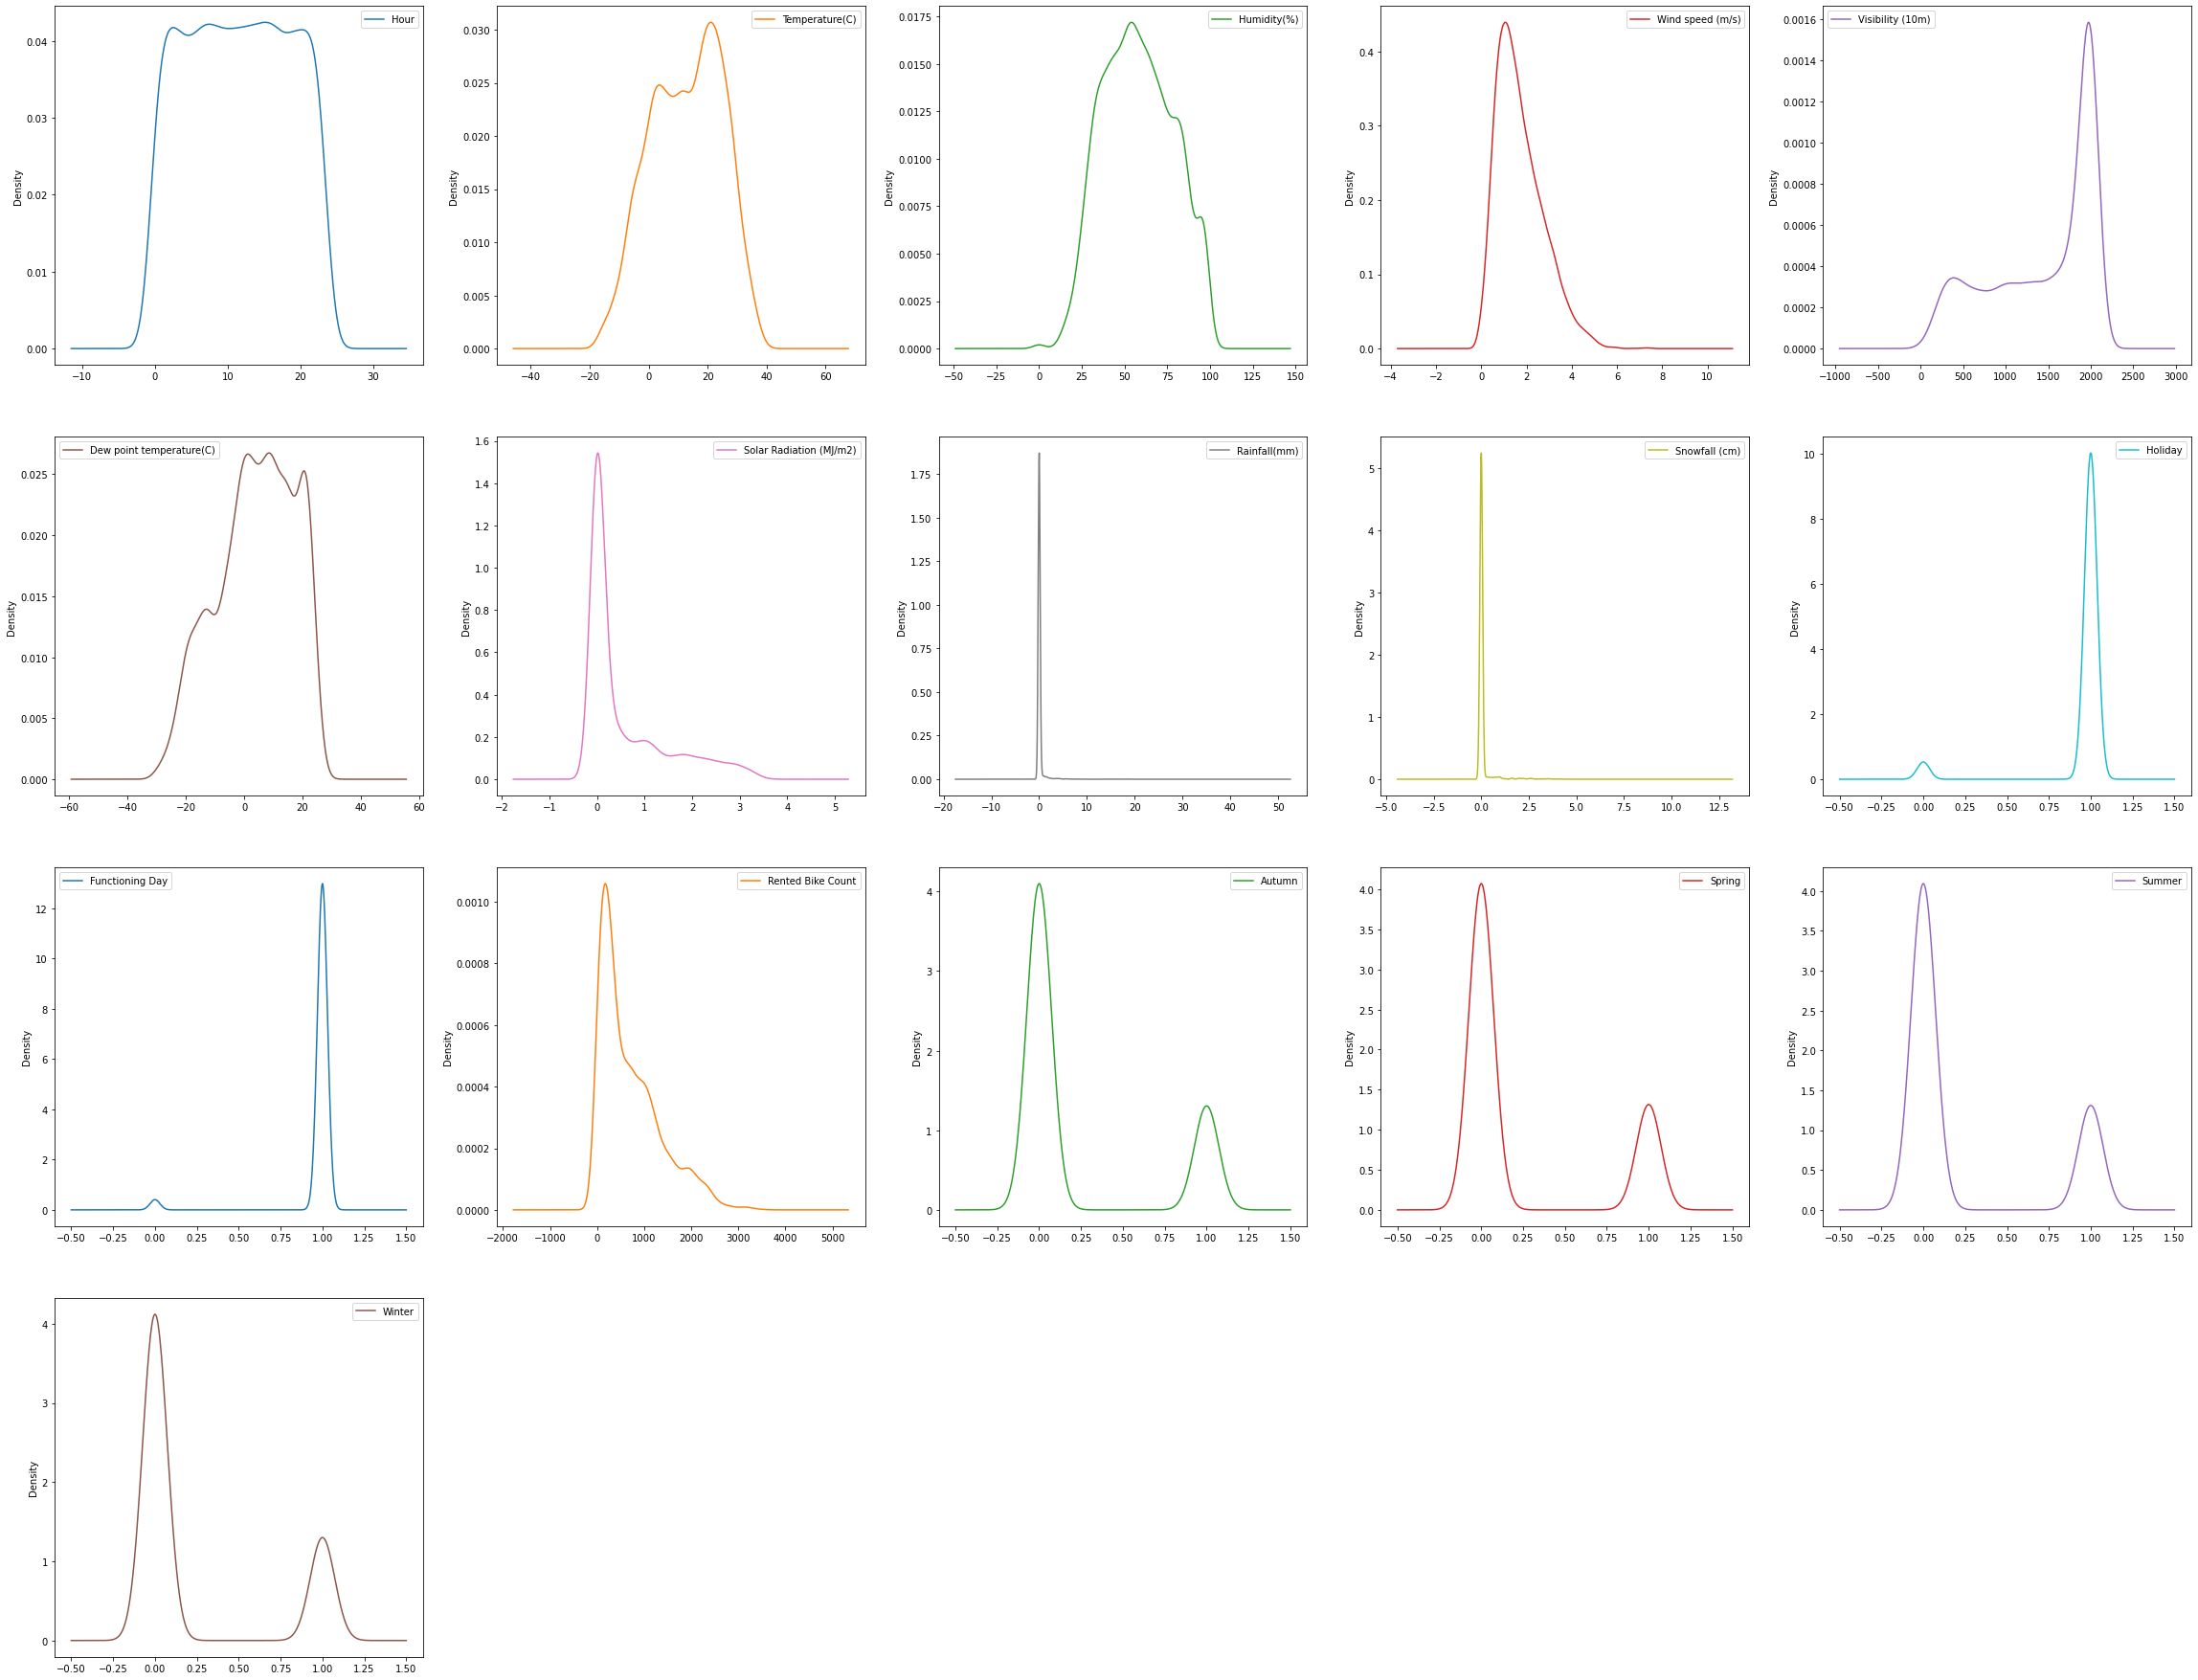

In [18]:
df.plot(kind = 'kde' , subplots = True , layout=(5,5), sharex=False, sharey=False, figsize=(40,40))

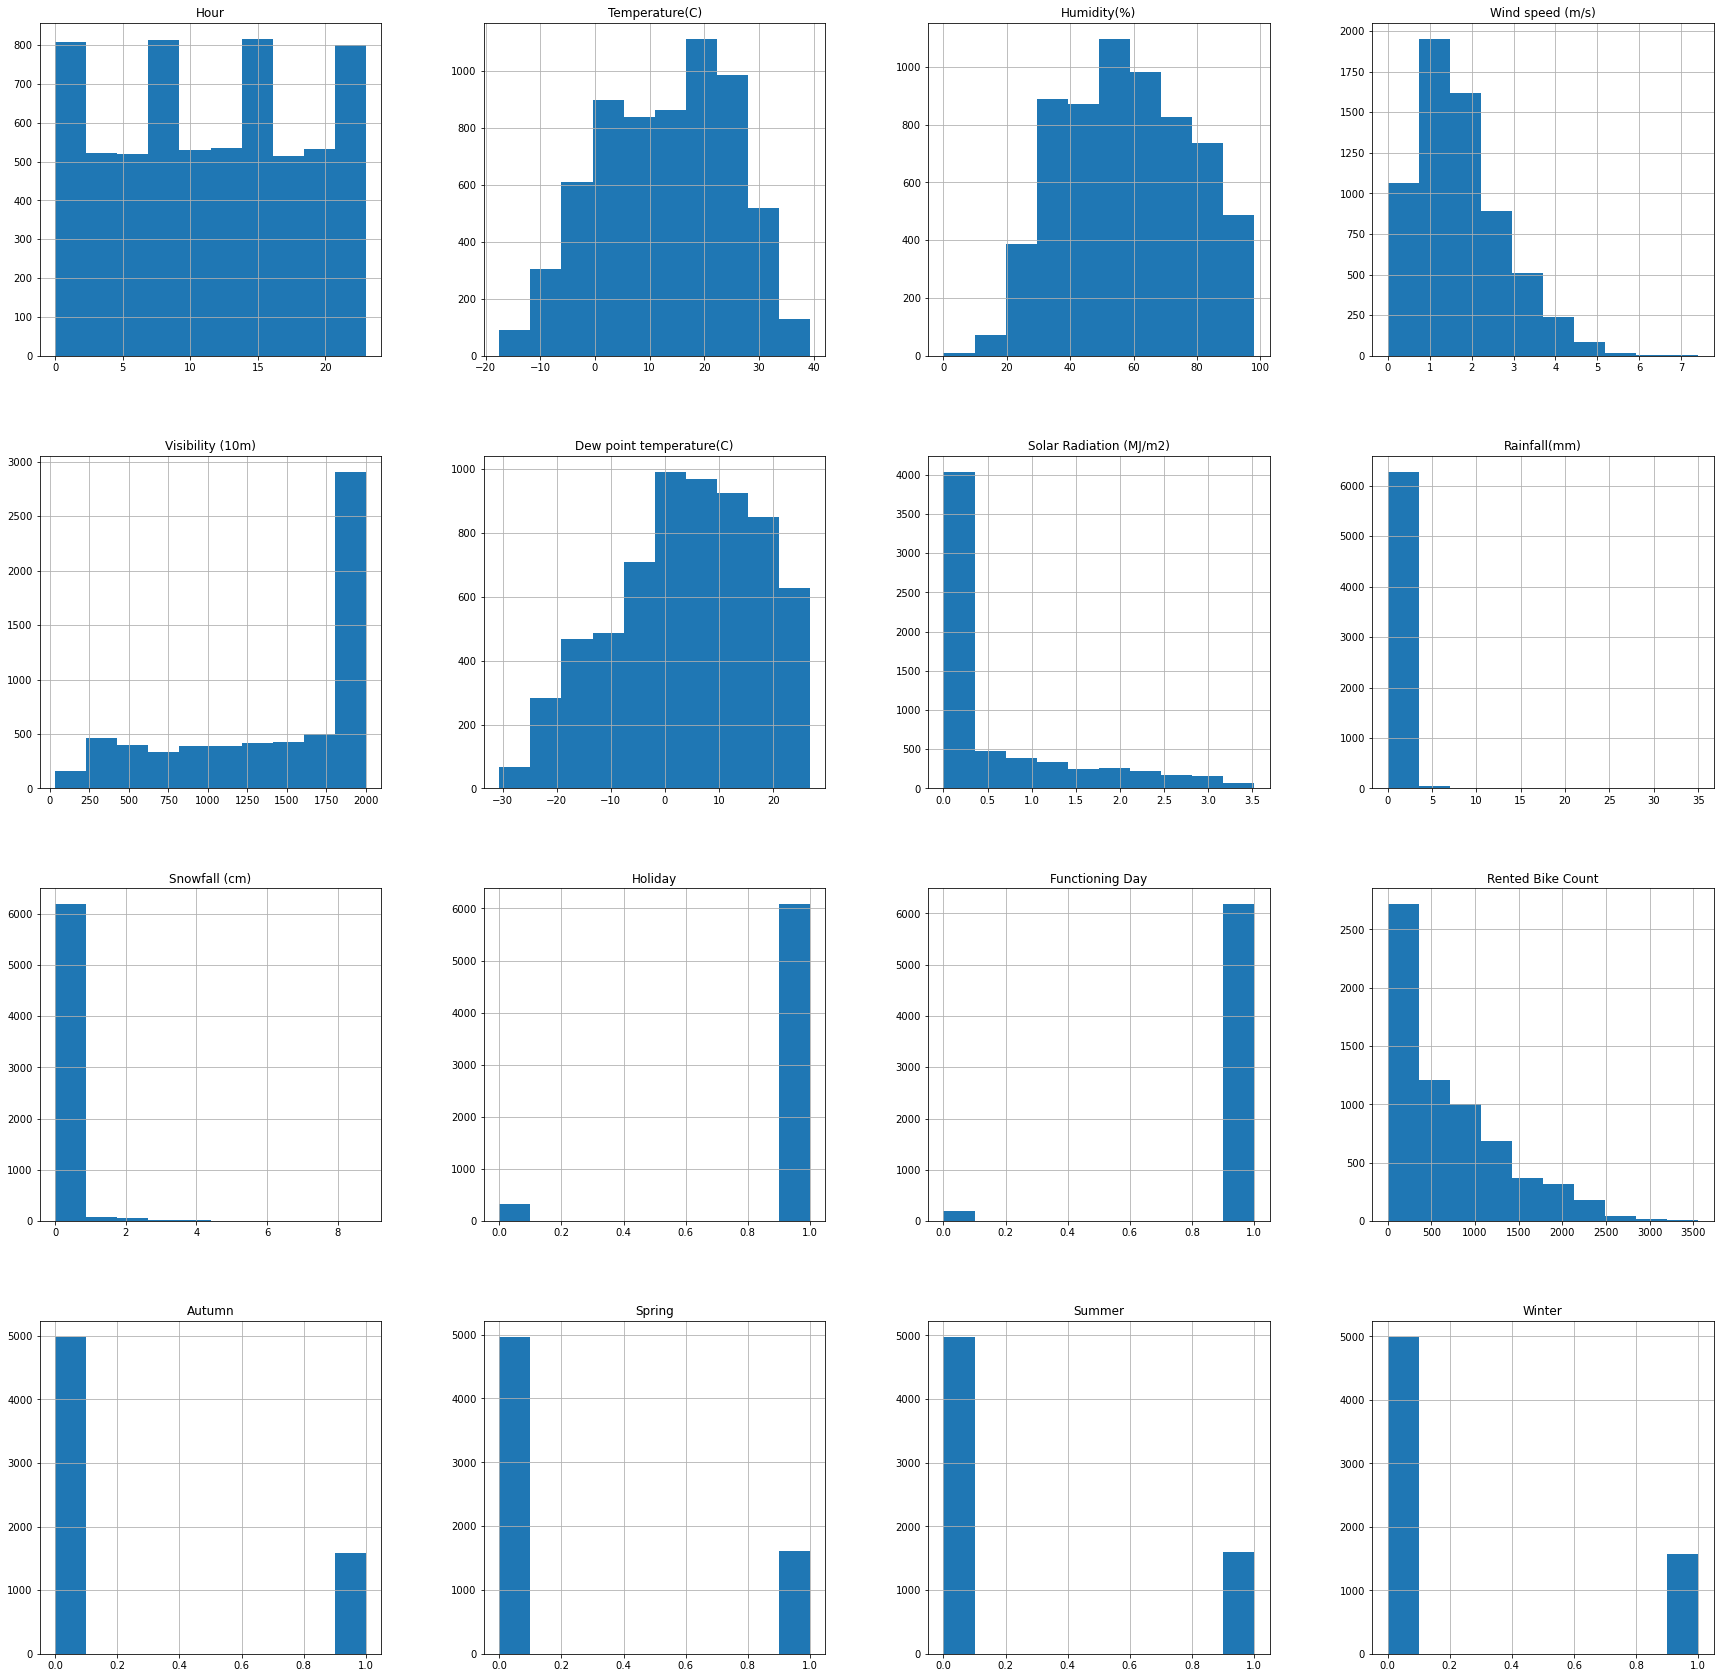

In [19]:
histPlot = df.hist(figsize=(30,30))

In [20]:
# To check the number of null values in each column  

df.isna().sum()

Hour                        177
Temperature(C)              209
Humidity(%)                 210
Wind speed (m/s)            193
Visibility (10m)            190
Dew point temperature(C)    197
Solar Radiation (MJ/m2)     201
Rainfall(mm)                211
Snowfall (cm)               190
Holiday                     167
Functioning Day             196
Rented Bike Count             0
Autumn                        0
Spring                        0
Summer                        0
Winter                        0
dtype: int64

In [21]:
# Replace with mean 

df['Hour'].fillna(df['Hour'].mean(),inplace = True)
df['Temperature(C)'].fillna(df['Temperature(C)'].mean(),inplace = True)
df['Dew point temperature(C)'].fillna(df['Dew point temperature(C)'].mean(),inplace = True)

In [22]:
# Replace with median
df['Humidity(%)'].fillna(df['Humidity(%)'].median(),inplace = True)
df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].median(),inplace = True)
df['Visibility (10m)'].fillna(df['Visibility (10m)'].median(),inplace = True)
df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].median(),inplace = True)
df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].median(),inplace = True)
df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].median(),inplace = True)
df['Holiday'].fillna(df['Holiday'].median(),inplace = True)
df['Functioning Day'].fillna(df['Functioning Day'].median(),inplace = True)


In [23]:
#After filling the missing values
df.isna().sum()

Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Holiday                     0
Functioning Day             0
Rented Bike Count           0
Autumn                      0
Spring                      0
Summer                      0
Winter                      0
dtype: int64


## KDE Plots analysis and usage of mean or media to fill missing values

### Columns replaced by mean 

Hour -  it looks almost like normal distribution mean is 11 from there the data is spread in equal quadrants.
Temperature - it looks almost like normal distribution mean is 12 from there the data is spread in equal quadrants.
Dew point temperature(C) - it looks almost like normal distribution mean is 3 from there the data is spread in equal quadrants.



### columns replaced by median

Humidity(%) - mean is 73 we need to use the median as the data is skewed

Wind speed (m/s) - mean = ~1 we need to use median as the data is skewed

Visibility (10m) -  mean = 1440 we need to use the media as the data is skewed

Solar Radiation (MJ/m2) - mean = 0.5   we need to use mediana s the data is skewed

Rainfall(mm) - mean = 0.14 we need to use media as the data is skewed

Snowfall (cm) - mean = 0.07 we need to use median as the data is skewed

Holiday - mean = 0.9 we have to use median as the data is skewed

Functioning Day - mean = 0.9 we have to use the median as the data is skewed



#### Test Data : Using density plots to assesses the distribution of data in the column 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

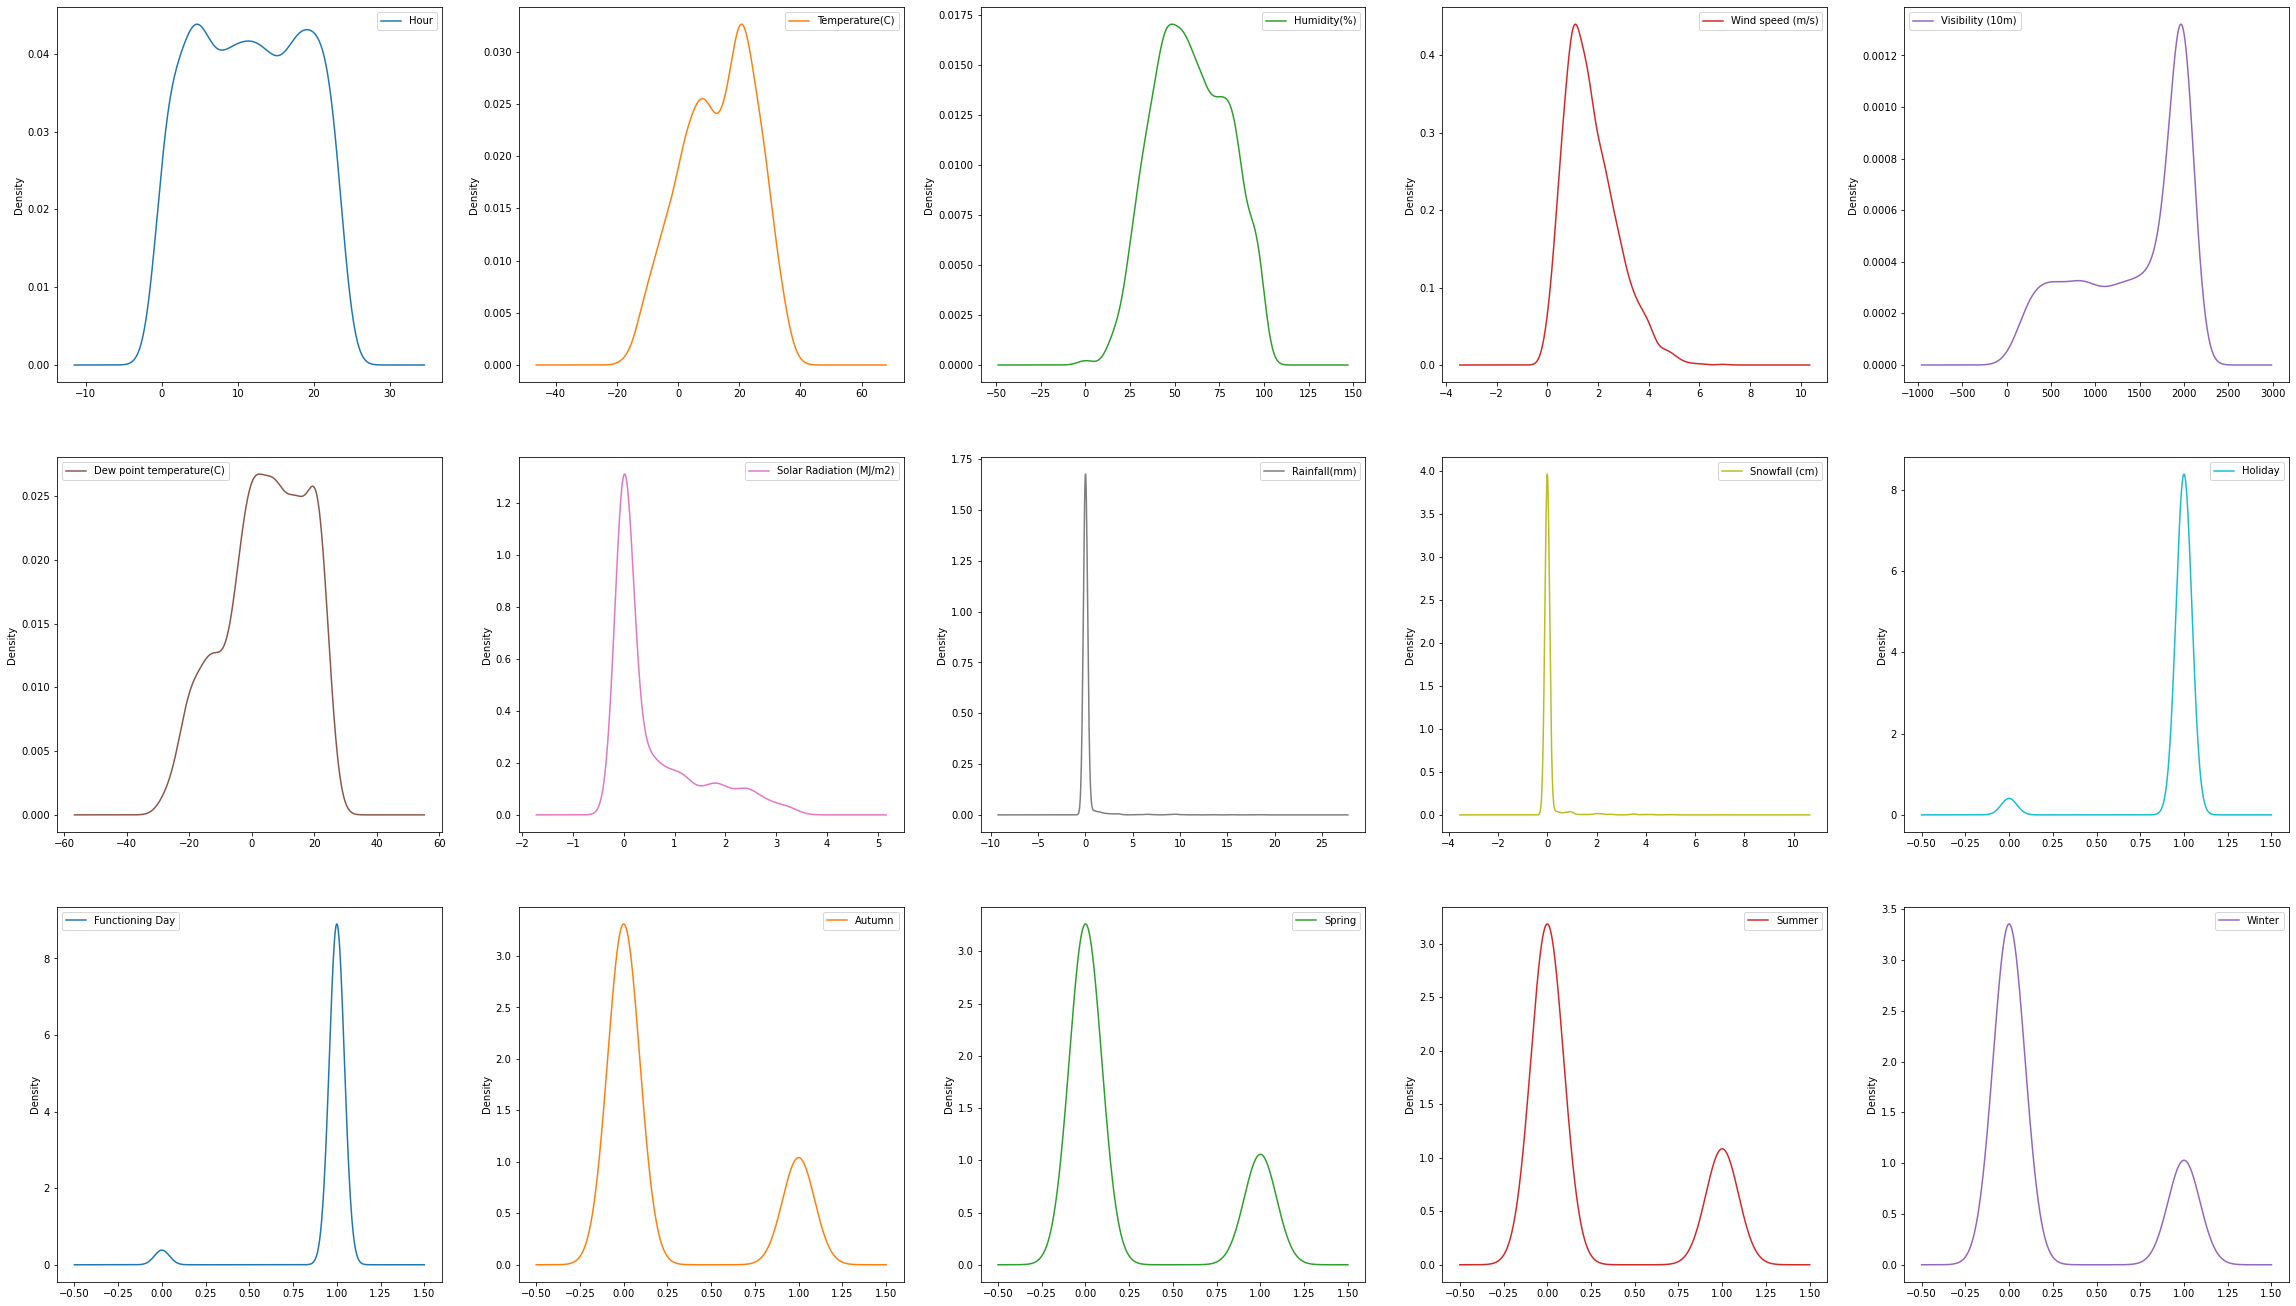

In [24]:
df_test.plot(kind = 'kde' , subplots = True , layout=(5,5), sharex=False, sharey=False, figsize=(40,40))

In [25]:
# To check the number of null values in each column  

df_test.isna().sum()

Hour                        61
Temperature(C)              61
Humidity(%)                 67
Wind speed (m/s)            91
Visibility (10m)            81
Dew point temperature(C)    62
Solar Radiation (MJ/m2)     56
Rainfall(mm)                76
Snowfall (cm)               44
Holiday                     67
Functioning Day             76
Autumn                       0
Spring                       0
Summer                       0
Winter                       0
dtype: int64

In [26]:
# Replace with mean 

df_test['Hour'].fillna(df['Hour'].mean(),inplace = True)
df_test['Temperature(C)'].fillna(df['Temperature(C)'].mean(),inplace = True)
df_test['Dew point temperature(C)'].fillna(df['Dew point temperature(C)'].mean(),inplace = True)

In [27]:
# Replace with median
df_test['Humidity(%)'].fillna(df['Humidity(%)'].median(),inplace = True)
df_test['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].median(),inplace = True)
df_test['Visibility (10m)'].fillna(df['Visibility (10m)'].median(),inplace = True)
df_test['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].median(),inplace = True)
df_test['Rainfall(mm)'].fillna(df['Rainfall(mm)'].median(),inplace = True)
df_test['Snowfall (cm)'].fillna(df['Snowfall (cm)'].median(),inplace = True)
df_test['Holiday'].fillna(df['Holiday'].median(),inplace = True)
df_test['Functioning Day'].fillna(df['Functioning Day'].median(),inplace = True)

In [28]:
#After filling the missing values
df_test.isna().sum()

Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Holiday                     0
Functioning Day             0
Autumn                      0
Spring                      0
Summer                      0
Winter                      0
dtype: int64

## Using Correlation Matrix to check the relation between different columns 
### Target column - 'Rented Bike Count'

<AxesSubplot:>

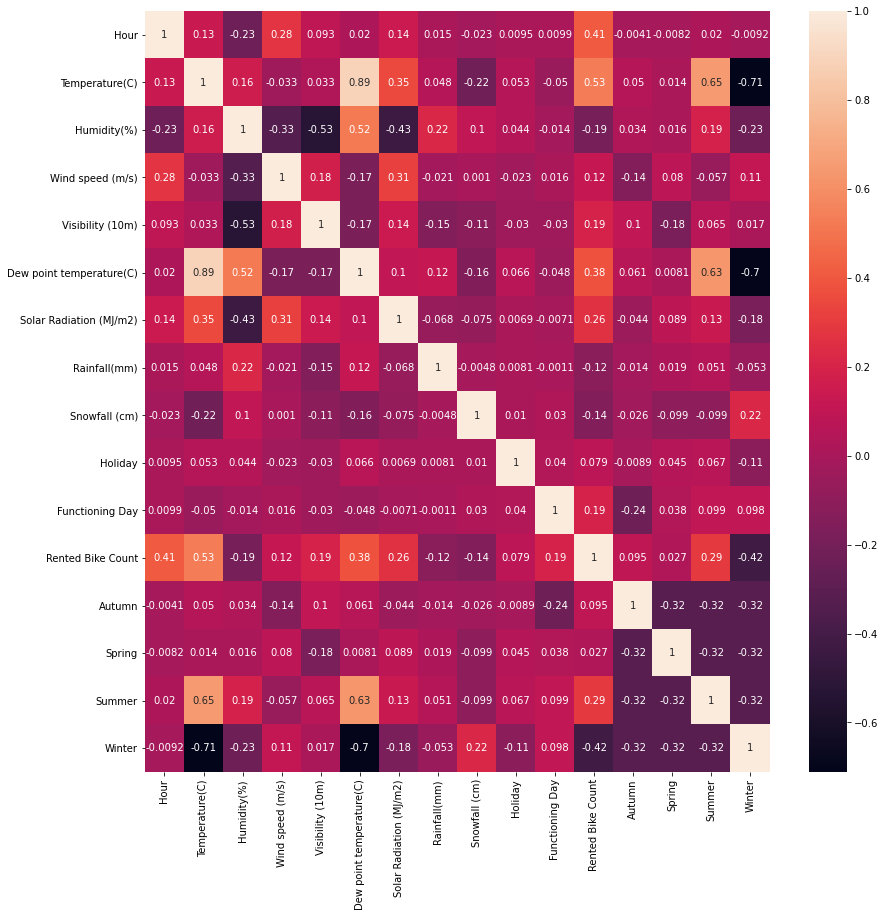

In [29]:
plt.figure(figsize=(14,14))
correlation=df.corr()
sns.heatmap(correlation,annot=True)

### Feature and Target datasets 

In [30]:
X = df.drop('Rented Bike Count', axis = 1)

y = df['Rented Bike Count']

## Scaling Techniques Used

### 1) MinMax Scaling
### 2) Standard Scaling

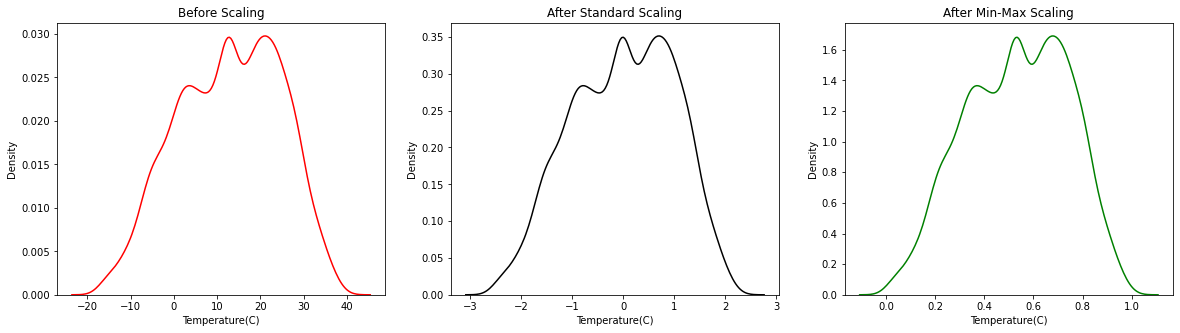

In [31]:
#Applying Min-Max scaler
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
minmax_df = pd.DataFrame(minmax_df, columns =X.columns)

#Applying StandardScaler
scaler = StandardScaler()
standard_df = scaler.fit_transform(X)
standard_df = pd.DataFrame(standard_df, columns = X.columns)


fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X['Temperature(C)'], ax = ax1,color ='r')

ax2.set_title('After Standard Scaling')
sns.kdeplot(standard_df['Temperature(C)'], ax = ax2, color ='black')

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['Temperature(C)'], ax = ax3, color ='g')
plt.show()

### Looking at the above graphs plots drawn on top of scaled data , we have choosed - "Min-Max Scaling"
#### Below are the reasons
#### With standard scaling the values turned to be very minute or very large for the given data which in turn creates a problem while clustering so we have choosen the min-max scaling technique
#### Using Standard scaler with distance thresold 20 the number of clusters formed are 15 and there grouping has fatalities the silhoutee is also very less. But with min-max scaling the number of best clusters turned to be 4 and data is also grouped equally.

#### [1624 1693 1617 1636]
#### Silhoutte score for cluster 4 and test data is 0.4820674488558203 for Min-Max Scaling

#### Test Data:  Applying Scaling for test data features with chosen MIN-MAX Scaling technique

In [32]:
#Scaling for test dataset
minmax_dft = scaler.fit_transform(df_test)
minmax_dft = pd.DataFrame(minmax_dft, columns = df_test.columns)

## Clustering - Unsupervised Learning

####  Agglomerative Clustering

In [33]:
#decleration
model = AgglomerativeClustering(distance_threshold = 20, n_clusters = None, 
                                linkage = 'ward')

# Train the model
model = model.fit(minmax_df)
model.n_clusters_

4

In [34]:
#using the above number of clusters
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(minmax_df)

array([3, 0, 1, ..., 2, 0, 0])

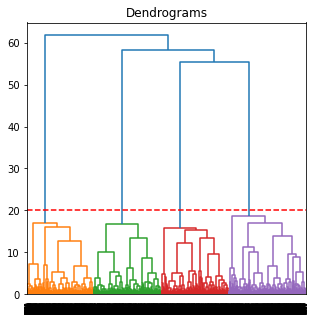

In [35]:
#It is taking approx 3 mins to execute this cell

plt.subplots(figsize = (5,5))
plt.title("Dendrograms")
dendrogram(linkage(minmax_df, method = 'ward'))
plt.axhline(y = 20, c = 'r', linestyle = '--')

plt.show()

**From the above dendogram, we can summarize that there are 4 clusters as per agglomerative clustering. This number is optimal number for choosing clusters. These clusters are united finally by one cluster as it is bottom up approach. Red line at 20 cuts the clusters, at which number of clusters is taken.**

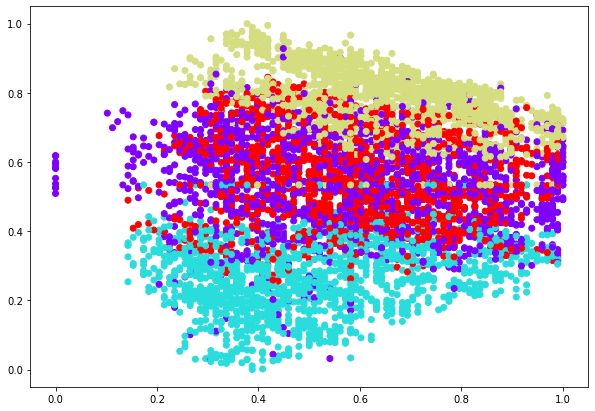

In [36]:
#visualize the clustering data on 2 columns 
plt.figure(figsize=(10, 7))  
plt.scatter(minmax_df['Humidity(%)'], minmax_df['Temperature(C)'], c=cluster.labels_, cmap='rainbow')

**These 4 colours indicate 4 different clusters.**

### Kmeans Clustering

#### Using "Elbow Method" ,  inertia attribute to record the cluster wellness for K-Means

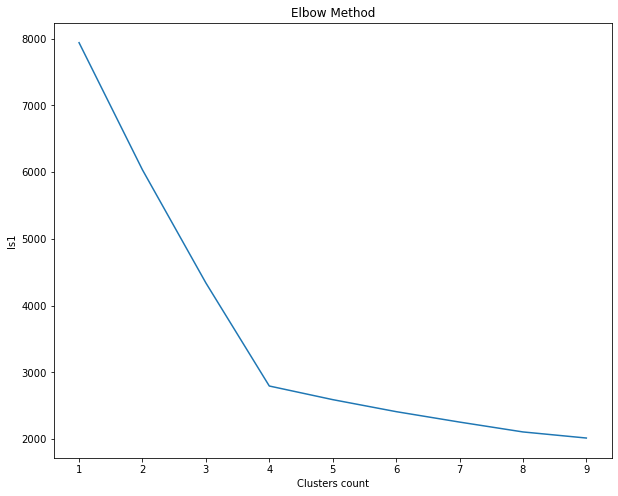

In [37]:
ls1=[]

#loop to view the performace for 1 to 9 clusters
for i in range(1,10):
    #Initialize
    kmeans = KMeans(n_clusters = i,init ='k-means++', random_state =0)
    #Compute k-means clustering.
    kmeans.fit(minmax_df)
    ls1.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1,10), ls1)
plt.title('Elbow Method')
plt.xlabel('Clusters count')
plt.ylabel('ls1')
plt.show()

In [38]:
for i in range(2,10):
    Kmean_cluster = KMeans(n_clusters = i , random_state = 0)  
    
    Kmean_cluster.fit(minmax_df)
    
    Kmean_label = Kmean_cluster.labels_
    
    Kmean_count = np.bincount(Kmean_label)
    print(Kmean_count)
    print(f'Silhoutte score for cluster {i} and test data is ' +
          str(silhouette_score(minmax_df, Kmean_cluster.labels_)))

[1577 4993]
Silhoutte score for cluster 2 and test data is 0.27344861826306355
[1593 1577 3400]
Silhoutte score for cluster 3 and test data is 0.37083657901900924
[1624 1690 1619 1637]
Silhoutte score for cluster 4 and test data is 0.4820913627038414
[1606 1602 1591 1033  738]
Silhoutte score for cluster 5 and test data is 0.41763246433442675
[1126 1599 1018 1608  489  730]
Silhoutte score for cluster 6 and test data is 0.3707960004232965
[ 969 1133 1594  988  716  682  488]
Silhoutte score for cluster 7 and test data is 0.31225702922965276
[ 693 1149 1430  931  725  511  165  966]
Silhoutte score for cluster 8 and test data is 0.3031447380521718
[ 483  957  427  877 1111  620  713  652  730]
Silhoutte score for cluster 9 and test data is 0.2592412140425004


In [39]:
kmeans = KMeans(n_clusters = 4,init ='k-means++', random_state =0)
kmeans.fit(minmax_df)
kmeans.transform(minmax_df)

array([[1.64644737, 1.57613821, 0.86096217, 1.68911968],
       [1.76971845, 0.77964172, 1.67364961, 1.62186141],
       [0.47526902, 1.59333451, 1.59621544, 1.7428177 ],
       ...,
       [1.716658  , 1.55096288, 1.62155629, 0.74964382],
       [1.53166664, 0.64552348, 1.51486669, 1.57991581],
       [1.66706656, 0.75442042, 1.65691197, 1.6829452 ]])

In [40]:
#SSE is defined as the sum of the squared distance between centroid and each member of the cluster
print ('final value of the sum of squared errors is: {:.4f}'.format(kmeans.inertia_))

final value of the sum of squared errors is: 2794.9303


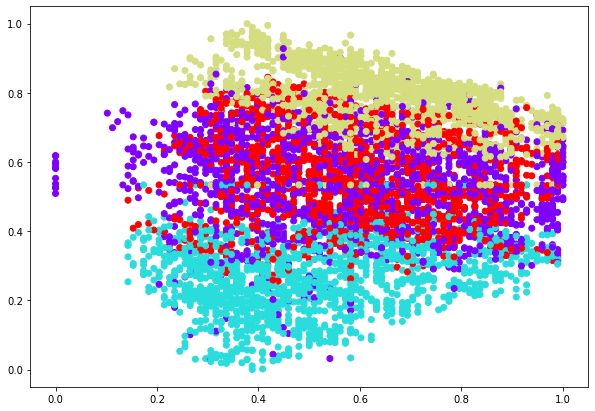

In [41]:
#visualize the clustering data on 2 columns 
plt.figure(figsize=(10, 7))  
plt.scatter(minmax_df['Humidity(%)'], minmax_df['Temperature(C)'], c=cluster.labels_, cmap='rainbow')

In [42]:
#Cluster values

Kmeans=KMeans(n_clusters=4)
cols=['Hour','Temperature(C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
      'Dew point temperature(C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)',
      'Holiday','Functioning Day','Autumn','Spring','Summer','Winter']
Kmeans.fit(minmax_df[cols])
centers=Kmeans.cluster_centers_
centersDf = pd.DataFrame(centers, columns=cols )
print ("centers values are:")
print(centersDf)

centers values are:
       Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  0.496930        0.552936     0.602158          0.200317          0.778510   
1  0.495453        0.538145     0.601452          0.251231          0.610634   
2  0.510885        0.771659     0.658675          0.218491          0.756439   
3  0.495158        0.269940     0.504370          0.258844          0.733430   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                  0.625097                 0.138748      0.003076   
1                  0.605689                 0.194702      0.005232   
2                  0.850919                 0.216467      0.006849   
3                  0.320230                 0.080288      0.000927   

   Snowfall (cm)   Holiday  Functioning Day        Autumn        Spring  \
0   5.764563e-03  0.946602         0.899879  9.635922e-01  2.775558e-17   
1   1.844968e-04  0.968731         0.982562  2.775558e-17  9.645219e-01   
2  

In [43]:
kmeans.cluster_centers_

array([[ 4.95329454e-01,  2.69855128e-01,  5.04153262e-01,
         2.58695580e-01,  7.33906251e-01,  3.20269619e-01,
         8.04638519e-02,  9.27163969e-04,  2.67297358e-02,
         9.11330049e-01,  1.00000000e+00,  5.55111512e-17,
         0.00000000e+00, -8.04911693e-16,  9.70443350e-01],
       [ 4.96116677e-01,  5.38043080e-01,  5.99945659e-01,
         2.52286902e-01,  6.13586605e-01,  6.04982536e-01,
         1.95720145e-01,  5.14792899e-03,  3.56374395e-04,
         9.68639053e-01,  9.81656805e-01,  2.77555756e-17,
         9.49112426e-01, -8.60422844e-16,  2.22044605e-16],
       [ 4.95585867e-01,  5.53016087e-01,  6.03994655e-01,
         1.98545983e-01,  7.76890340e-01,  6.25800083e-01,
         1.36930414e-01,  3.13068031e-03,  5.86781964e-03,
         9.46263125e-01,  8.99320568e-01,  9.80852378e-01,
         0.00000000e+00, -8.32667268e-16,  1.11022302e-16],
       [ 5.11356752e-01,  7.71439292e-01,  6.58478052e-01,
         2.18461589e-01,  7.57302765e-01,  8.50633600

In [44]:
kmeans.labels_

array([2, 1, 0, ..., 3, 1, 1], dtype=int32)

### From the above output its clear that Data is clustered into 4 groups

In [45]:
# view the data after scaling
minmax_df.head()

Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  1.000000        0.375000     0.846939          0.148649          0.181495   
1  0.608696        0.730634     0.479592          0.310811          0.247585   
2  0.826087        0.183099     0.336735          0.270270          0.942552   
3  0.521739        0.524648     0.989796          0.108108          0.104220   
4  0.173913        0.371479     0.714286          0.108108          0.966446   

   Dew point temperature(C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                  0.552265                 0.000000      0.000000   
1                  0.740418                 0.815341      0.000000   
2                  0.174216                 0.000000      0.000000   
3                  0.738676                 0.039773      0.057143   
4                  0.510453                 0.000000      0.000000   

   Snowfall (cm)  Holiday  Functioning Day  Autumn  Spring  Summer  Winter  
0       0.045455      1.0              1.0     1.0     0.0     0.0     0.0  
1       0.000000      1.0              1.0     0.0     1.0     0.0     0.0  
2       0.000000      1.0              1.0     0.0     0.0     0.0     1.0  
3       0.000000      1.0              1.0     0.0     1.0     0.0     0.0  
4       0.000000      1.0              1.0     1.0     0.0     0.0     0.0

# Regression Model Training and Evaluation

### Regression - Statistical Approach

In [46]:
# choosing the feature set
X = minmax_df

In [47]:
# add a constant column to take care of the intercept
X = sm.add_constant(X) 

# build the model Ordinary least squares method
model = sm.OLS(y,X).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     499.8
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:25:40   Log-Likelihood:                -49316.
No. Observations:                6570   AIC:                         9.866e+04
Df Residuals:                    6554   BIC:                         9.877e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -923.8404     70.350    -13.132      0.000   -1061.748    -785.932
Hour                       646.8872     19.959     32.410      0.000     607.761     686.014
Temperature(C)             968.6419     96.160     10.073      0.000     780.137    1157.147
Humidity(%)               -929.9210     57.391    -16.203      0.000   -1042.426    -817.416
Wind speed (m/s)           121.4936     44.506      2.730      0.006      34.247     208.740
Visibility (10m)            61.5671     22.563      2.729      0.006      17.335     105.799
Dew point temperature(C)   540.6698     98.090      5.512      0.000     348.381     732.959
Solar Radiation (MJ/m2)   -206.5830     29.553     -6.990      0.000    -264.516    -148.650
Rainfall(mm)             -1981.7296    171.528    -11.553      0.000   -2317.980   -1645.479
Snowfall (cm)              226.5559    123.041      1.841      0.066     -14.645     467.757
Holiday                    114.8396     25.508      4.502      0.000      64.836     164.843
Functioning Day            921.2618     33.230     27.724      0.000     856.121     986.403
Autumn                     131.1279     32.648      4.016      0.000      67.127     195.129
Spring                      15.2594     32.524      0.469      0.639     -48.498      79.017
Summer                      -7.6878     35.071     -0.219      0.826     -76.439      61.063
Winter                    -223.0439     35.259     -6.326      0.000    -292.163    -153.925
==============================================================================
Omnibus:                      983.037   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1872.662
Skew:                           0.938   Prob(JB):                         0.00
Kurtosis:                       4.823   Cond. No.                         70.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation : 
#### From the above summary we can see the p value is greater for 0.05 significance level which means that they dont have any reason to reject the null-hypotesis.
#### So, the columns that are having p>0.05 are dropped and model is using fit method without these columns as below.

In [49]:
#Dropping columns with p>0.05
X_mod = X.drop(['Spring', 'Summer', 'Snowfall (cm)'], axis = 1)
X_mod = sm.add_constant(X_mod) 
#Ordinary least squares method 
model = sm.OLS(y,X_mod).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     624.3
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:25:40   Log-Likelihood:                -49319.
No. Observations:                6570   AIC:                         9.866e+04
Df Residuals:                    6557   BIC:                         9.875e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -896.5693     61.297    -14.627      0.000   -1016.732    -776.407
Hour                       649.4515     19.899     32.637      0.000     610.443     688.460
Temperature(C)             947.1070     94.191     10.055      0.000     762.461    1131.753
Humidity(%)               -915.5885     56.860    -16.102      0.000   -1027.053    -804.124
Wind speed (m/s)           125.3283     44.445      2.820      0.005      38.201     212.456
Visibility (10m)            55.2916     22.001      2.513      0.012      12.162      98.421
Dew point temperature(C)   518.0812     96.881      5.348      0.000     328.164     707.999
Solar Radiation (MJ/m2)   -199.8453     29.378     -6.803      0.000    -257.435    -142.255
Rainfall(mm)             -1993.6978    171.435    -11.629      0.000   -2329.766   -1657.630
Holiday                    114.8807     25.461      4.512      0.000      64.968     164.793
Functioning Day            919.6958     33.124     27.765      0.000     854.762     984.629
Autumn                     125.8573     14.514      8.671      0.000      97.405     154.309
Winter                    -235.1295     20.460    -11.492      0.000    -275.238    -195.021
==============================================================================
Omnibus:                      979.539   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1858.123
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       4.811   Cond. No.                         69.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Simple Linear Regression
### For the simple linear regression we are considering only the column ' Temperature' has high correlation with the target column compared to anyother column Correlation coefficient = 0.54

In [50]:
# selecting the temperature column as feature for prediction
x = minmax_df['Temperature(C)']

In [51]:
#Intializing
model = st.linregress(x,y)
model

LinregressResult(slope=1656.2725591269673, intercept=-175.93232413923783, rvalue=0.5341770903950772, pvalue=0.0, stderr=32.34283944064384)

In [52]:
#solving linear regresssion equation with slope and intercept
y_predict = model.slope * x + model.intercept

#Calculating the regression error 𝜖
epsilon = y - y_predict

Checking simple linear regression assumptions
has a mean of zero
has constant variance
is normal

In [53]:
# has a mean of zero
epsilon.mean()

8.427015216198936e-14

Text(0, 0.5, '$\\epsilon$')

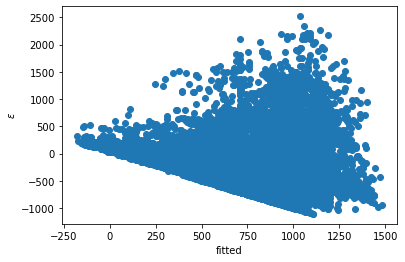

In [54]:
# has constant variance

%matplotlib inline
plt.scatter(y_predict, epsilon)
plt.xlabel('fitted')
plt.ylabel('$\epsilon$')

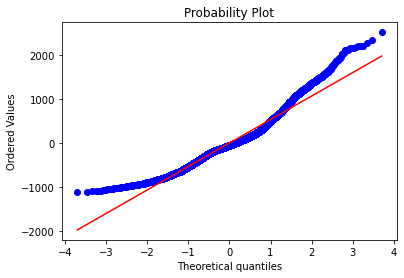

In [55]:
# is normal
%matplotlib inline
st.probplot(epsilon, dist = 'norm', plot = plt)
plt.show()

##### Here the plotted points seems to have a non linear pattern

<AxesSubplot:ylabel='Frequency'>

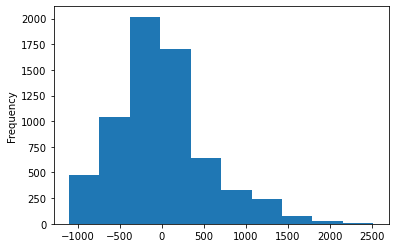

In [56]:
%matplotlib inline
epsilon.plot(kind = 'hist', bins = 10)

### Try the following transformations:
#### ln(y)
#### 1/y
#### sqrt(y)
#### 2^y
 

In [57]:
# Transforming y as y^1/2
y_modified = np.sqrt(y)
model = st.linregress(x,y_modified)

ym_predict = model.slope * x + model.intercept
#Calculating the regression error 𝜖
epsilon = y_modified - ym_predict

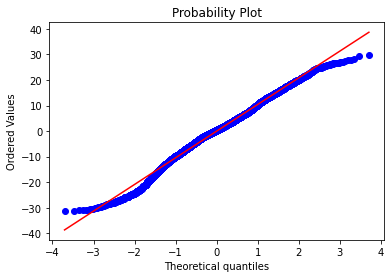

In [58]:
# is normal
%matplotlib inline
st.probplot(epsilon, dist = 'norm', plot = plt)
plt.show()

#### plotted points lie reasonably close to the diagonal line on the plot then conclude that the "normality" assumption holds on y_modified

<AxesSubplot:ylabel='Frequency'>

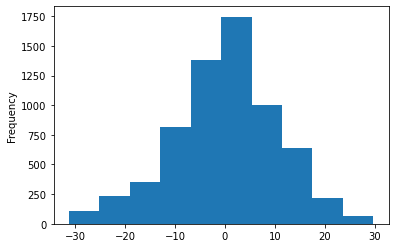

In [59]:
%matplotlib inline
epsilon.plot(kind = 'hist', bins = 10)

In [60]:
epsilon.mean()

3.6884414007759845e-15

Text(0, 0.5, '$\\epsilon$')

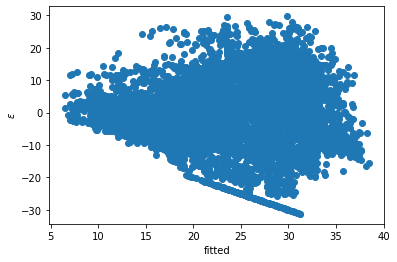

In [61]:
# has constant variance

%matplotlib inline
plt.scatter(ym_predict, epsilon)
plt.xlabel('fitted')
plt.ylabel('$\epsilon$')

#### Correlation

In [62]:
np.corrcoef(x, y_modified)

array([[1.        , 0.53602101],
       [0.53602101, 1.        ]])

#### t - test for the population correlation coefficient

##### The output of st.pearson r are the correlation coefficient and the two-tailed  p-value obtained.

In [63]:
val = st.pearsonr(x, y_modified)

In [64]:
print('Correlation coefficient: ', val[0])
print('p-value (two-tailed): %.5f'%val[1])

Correlation coefficient:  0.536021009568777
p-value (two-tailed): 0.00000


Since the  p - value is less than the significance level  𝛼 =0.05
sufficinet evidence exists that a positive linear relationship exists between x and y_modified.

## Multiple Regression

In [65]:
# choosing the feature set
X = minmax_df.drop(['Spring', 'Summer', 'Snowfall (cm)'], axis = 1)

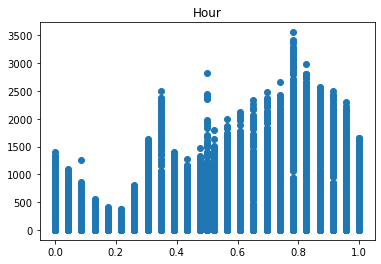

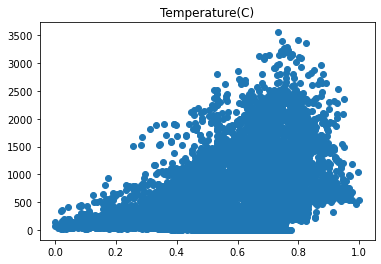

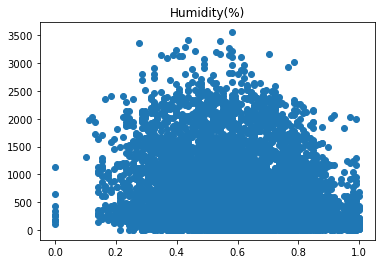

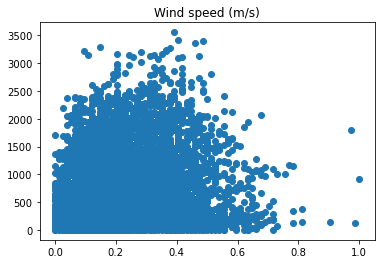

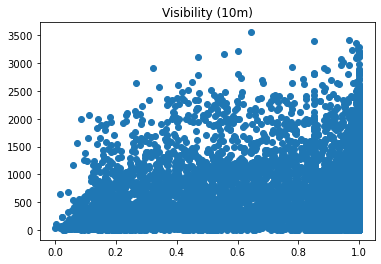

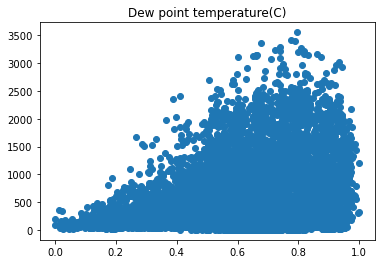

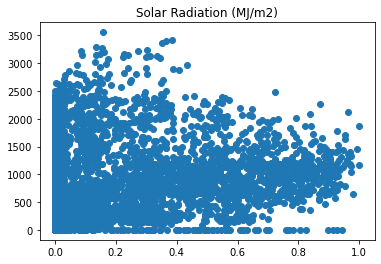

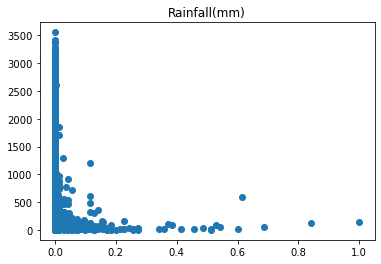

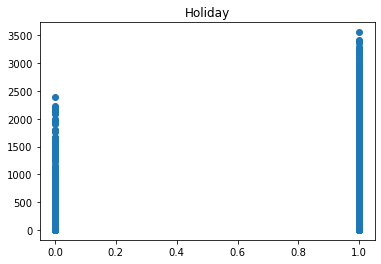

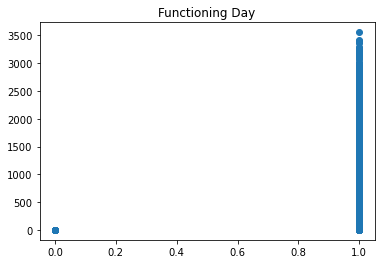

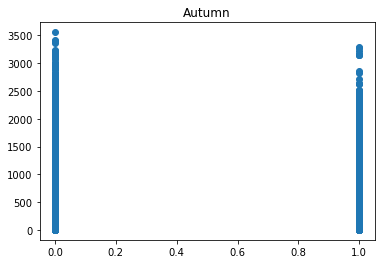

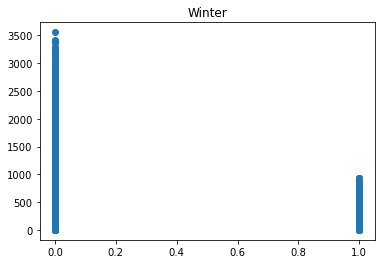

In [66]:
#Scatter plots for all feature columns 

%matplotlib inline

for col in X.columns:
    plt.scatter(X[col], y)
    plt.title(col)
    plt.show()

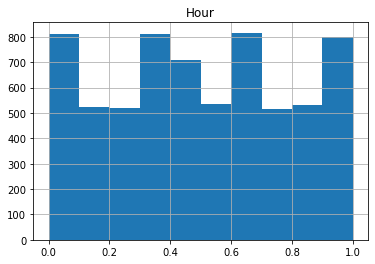

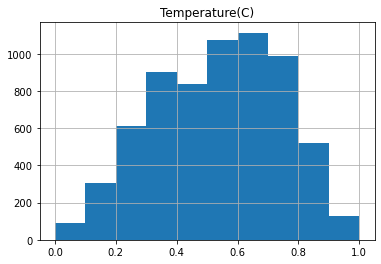

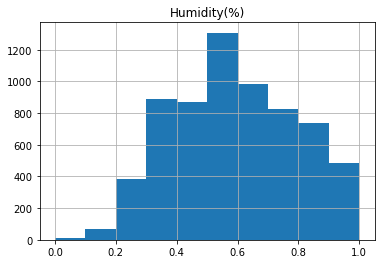

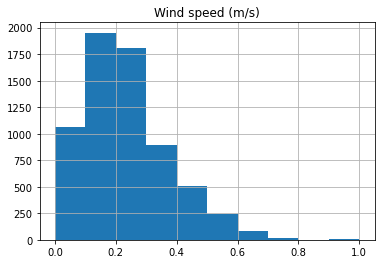

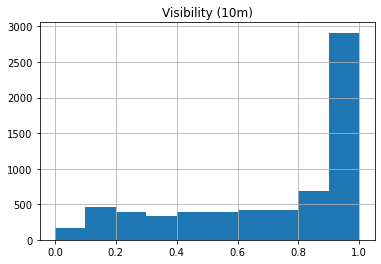

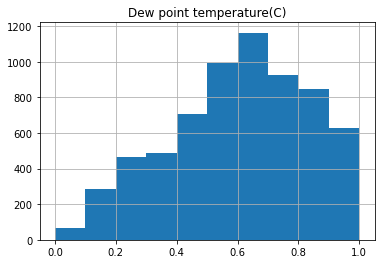

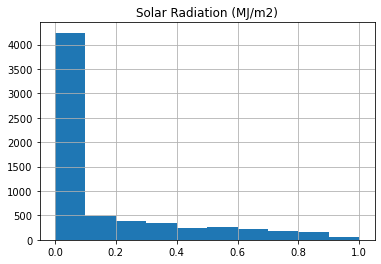

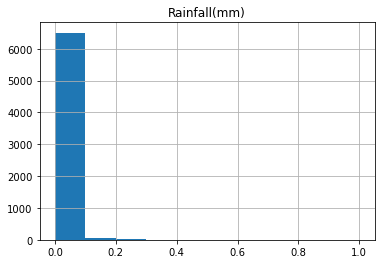

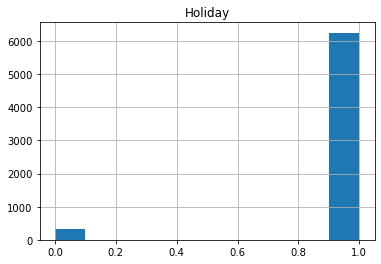

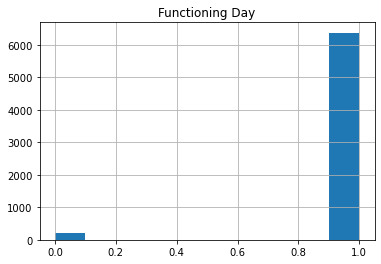

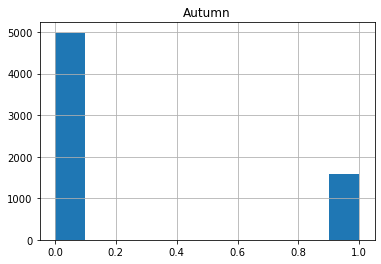

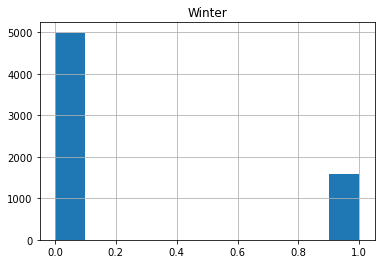

In [67]:
%matplotlib inline
# Histograms for all feature columns 
for col in X.columns:
    hist = X[col].hist(bins = 10)
    plt.title(col)
    plt.show()

In [68]:
#Pearson product-moment correlation coefficients.
np.corrcoef(X.T)

array([[ 1.        ,  0.13484548, -0.22759732,  0.27611962,  0.09296656,
         0.01991854,  0.14265979,  0.01508463,  0.00947895,  0.00992338,
        -0.00411265, -0.00915392],
       [ 0.13484548,  1.        ,  0.15504209, -0.03300283,  0.03294344,
         0.88685319,  0.35057207,  0.04756486,  0.05285473, -0.04976006,
         0.05044068, -0.71155101],
       [-0.22759732,  0.15504209,  1.        , -0.33366848, -0.5300461 ,
         0.51932343, -0.43423169,  0.22054833,  0.0440666 , -0.01400295,
         0.03418909, -0.23226014],
       [ 0.27611962, -0.03300283, -0.33366848,  1.        ,  0.17550684,
        -0.17051289,  0.31410882, -0.02092862, -0.02304582,  0.01584164,
        -0.13697707,  0.10700788],
       [ 0.09296656,  0.03294344, -0.5300461 ,  0.17550684,  1.        ,
        -0.17098815,  0.13897234, -0.1462326 , -0.03034325, -0.03013896,
         0.1000562 ,  0.01710534],
       [ 0.01991854,  0.88685319,  0.51932343, -0.17051289, -0.17098815,
         1.        ,  

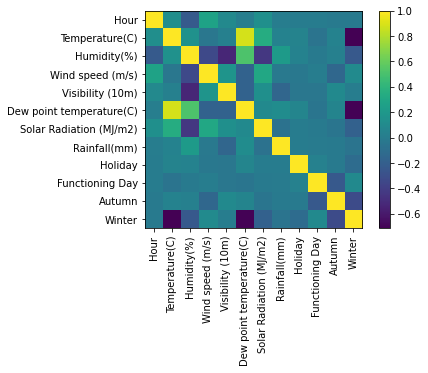

In [69]:
%matplotlib inline

plt.imshow(np.corrcoef(X.T))
plt.xticks(np.arange(12), X.columns, rotation = 90)
plt.yticks(np.arange(12), X.columns)
plt.colorbar()
plt.show()

### Regression - Machine learning approach

### Multivariate - 2

#### Model trainining with 70% as train data and 30% as test data.

In [70]:
#Using train_test_split to split the data 
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state = 0)

#Scaling the splitted data
scaler = MinMaxScaler()

#Fit the data
scaler.fit(X_train)

#Transform the data

#Train data
X_train_scaled = scaler.transform(X_train)
#Test data
X_valid_scaled = scaler.transform(X_valid)

#Applying linear regression for tain data 
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)

#Calculate the scores for the train and test data
print('train r2-score: ', lreg.score(X_train_scaled, y_train))
print('validation r2-score: ', lreg.score(X_valid_scaled, y_valid))

train r2-score:  0.5411449121467613
validation r2-score:  0.5134431436761961


#### Model trainining with 80% as train data and 20% as test data.

In [71]:
#Using train_test_split to split the data 
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 0)

#Scaling the splitted data
scaler = MinMaxScaler()

#Fit the data
scaler.fit(X_train)

#Transform the data

#Train data
X_train_scaled = scaler.transform(X_train)
#Test data
X_valid_scaled = scaler.transform(X_valid)

#Applying linear regression for tain data 
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)

#Calculate the scores for the train and test data
print('train r2-score: ', lreg.score(X_train_scaled, y_train))
print('validation r2-score: ', lreg.score(X_valid_scaled, y_valid))

train r2-score:  0.5374113286330617
validation r2-score:  0.516156183957653


#### Model trainining with 90% as train data and 10% as test data.

In [72]:
#Using train_test_split to split the data 
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.1, random_state = 0)

#Scaling the splitted data
scaler = MinMaxScaler()

#Fit the data
scaler.fit(X_train)

#Transform the data

#Train data
X_train_scaled = scaler.transform(X_train)
#Test data
X_valid_scaled = scaler.transform(X_valid)

#Applying linear regression for tain data 
lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
print(lreg.intercept_)
print(lreg.coef_)

#Calculate the scores for the train and test data
print('train r2-score: ', lreg.score(X_train_scaled, y_train))
print('validation r2-score: ', lreg.score(X_valid_scaled, y_valid))

-909.6433917211231
[  648.31735662  1003.57420299  -912.11001627   128.52135817
    53.58650211   485.57546056  -206.57808174 -1963.23330722
   120.5057467    915.80956603   123.89129649  -231.53745252]
train r2-score:  0.5343015187669671
validation r2-score:  0.522966372124259


### Linear Regression metrics

In [73]:

ypred = lreg.predict(X_valid_scaled)
mse = mean_squared_error(y_valid,ypred)
#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(y_valid,ypred))


Mean Square Error:  198319.3916422973
Root Mean Square Error:  445.33065428094807
Mean Absolute Error is: 332.4748076001624


### simple linear regression

In [74]:
# Simple linear regression test-train split
x = minmax_df['Temperature(C)']
y = df["Rented Bike Count"]

#splitting data into training and testing data
trainDataX,testDataX, trainDataY, testDataY = train_test_split(x,y, test_size=0.2, random_state=0)


In [75]:
from sklearn.linear_model import LinearRegression
# Re-shape the data 
XTrain= trainDataX.values.reshape(-1, 1)
YTrain= trainDataY.values.reshape(-1, 1)
XTest= testDataX.values.reshape(-1, 1)
YTest= testDataY.values.reshape(-1, 1)
trainDataX.shape, trainDataY.shape



((5256,), (5256,))

In [76]:
# Linear regression model fitting

regre = LinearRegression()
regre.fit(XTrain, YTrain)
print(regre.intercept_)
print(regre.coef_)

#to make predictions on test data 
Yprediction = regre.predict(XTest)




[-178.25020162]
[[1662.08102873]]


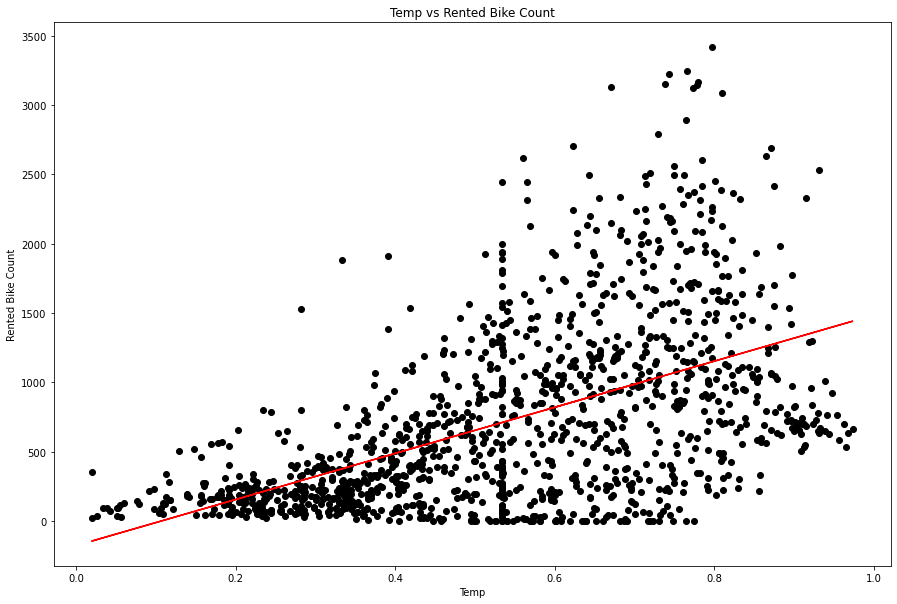

In [77]:
#Visualise the testdata and predicted data
import matplotlib.pyplot as plt
from PIL.Image import core as _imaging
%matplotlib inline
#to draw scatterplot 
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(testDataX, testDataY,color='black')
plt.plot(testDataX, Yprediction, color = 'red')
plt.title("Temp vs Rented Bike Count")
plt.xlabel("Temp")
plt.ylabel("Rented Bike Count")
plt.show()
plt.close()


In [78]:
from sklearn import metrics
print('Mean Absolute Error is:', metrics.mean_absolute_error(YTest, Yprediction))
print('Mean Squared Error is:', metrics.mean_squared_error(YTest, Yprediction))
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(YTest, Yprediction)))
print('r2_score :', r2_score(YTest, Yprediction))

Mean Absolute Error is: 413.5176825718873
Mean Squared Error is: 307018.8702813908
Root Mean Squared Error is: 554.0928354358958
r2_score : 0.2813215709521881


### Multivariate - 1

In [79]:

from sklearn.preprocessing import normalize

v1 = minmax_df[['Temperature(C)','Hour','Dew point temperature(C)']]

#diving into train and test data
trainVar1,testVar1,trainVar2,testVar2 = train_test_split(v1,y, train_size=0.80,random_state=0)
#normalizing raw data and finding intercept and slope
regressor = LinearRegression().fit(normalize(trainVar1), trainVar2)
print(regressor.intercept_)
print(regressor.coef_)
#making predictions using test data
Ypredict = regressor.predict(normalize(testVar1))
print('Mean Absolute Error is:', metrics.mean_absolute_error(testVar2, Ypredict))
print('Mean Squared Error is:', metrics.mean_squared_error(testVar2, Ypredict))
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(testVar2, Ypredict)))
print('r2_score :', r2_score(testVar2, Ypredict))


-2957.68199454129
[3854.49204007 2180.91602147  891.22512659]
Mean Absolute Error is: 436.33653640889287
Mean Squared Error is: 326828.5221652952
Root Mean Squared Error is: 571.6891831802445
r2_score : 0.2349505792184876


### SGD Regressor

In [80]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state = 0, max_iter = 100000, learning_rate = 'constant', eta0 = 0.001)
sgd.fit(X_train_scaled, y_train)

ypred = sgd.predict(X_valid_scaled)

mse = mean_squared_error(y_valid,ypred)

#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(y_valid,ypred))
print('train r2-score: ', sgd.score(X_train_scaled, y_train))
print('validation r2-score: ', sgd.score(X_valid_scaled, y_valid))


Mean Square Error:  200890.8662516909
Root Mean Square Error:  448.20850756282044
Mean Absolute Error is: 333.627292439148
train r2-score:  0.5293175216503467
validation r2-score:  0.5167809968477861


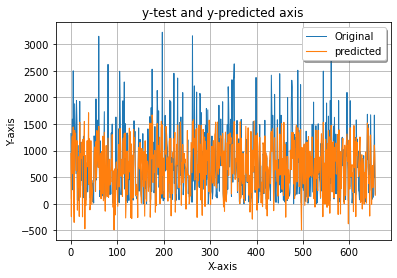

In [81]:
x_ax = range(len(y_valid))
plt.plot(x_ax, y_valid, linewidth = 1, label = "Original")
plt.plot(x_ax, ypred, linewidth = 1.1, label = "predicted")
plt.title("y-test and y-predicted axis")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

In [82]:
sgd.n_iter_

56

In [83]:
train_score = []
validation_score = []
index = []

for max_iter in [100000, 1000000, 10000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001, 0.00001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X_train_scaled, y_train)
        train_score.append(sgd.score(X_train_scaled, y_train))
        validation_score.append(sgd.score(X_valid_scaled, y_valid))
        index.append((max_iter, eta0))

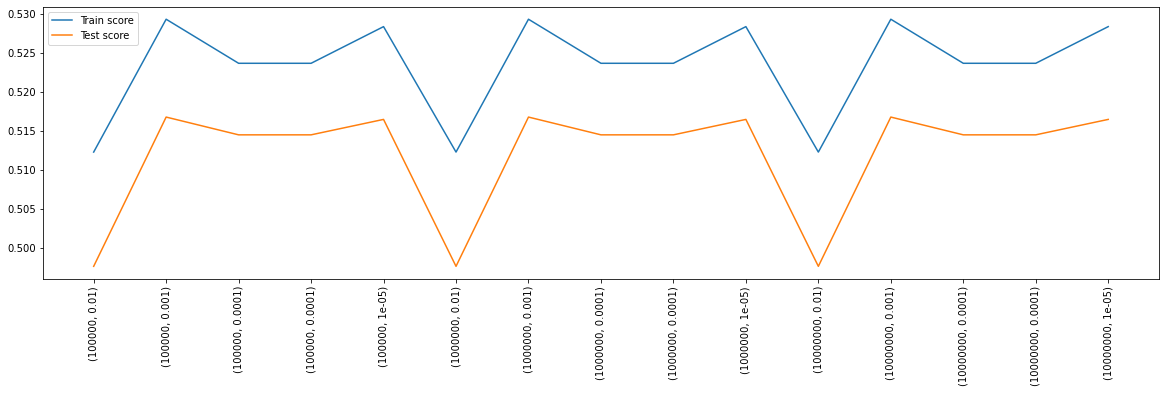

In [84]:
%matplotlib inline
# To view the test and train scores 
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.plot(range(len(index)), validation_score, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

#### Irrespective of the training rate the test and train scores. So there is no reasons to use the sgd regressor to predict the values. 

In [85]:
X_tree = df.drop('Rented Bike Count', axis = 1)

y_tree = df['Rented Bike Count']

Text(0, 0.5, 'Rented Bike Count')

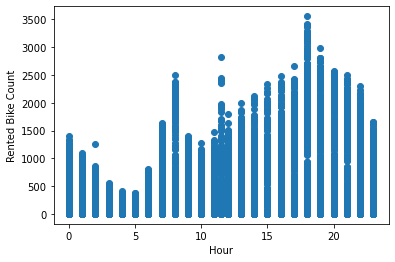

In [86]:
%matplotlib inline
plt.scatter(df['Hour'], df['Rented Bike Count'])
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')

### Decision Tree Regressor

In [87]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(df['Hour'].values.reshape(-1,1), df['Rented Bike Count'].values)

DecisionTreeRegressor(random_state=0)

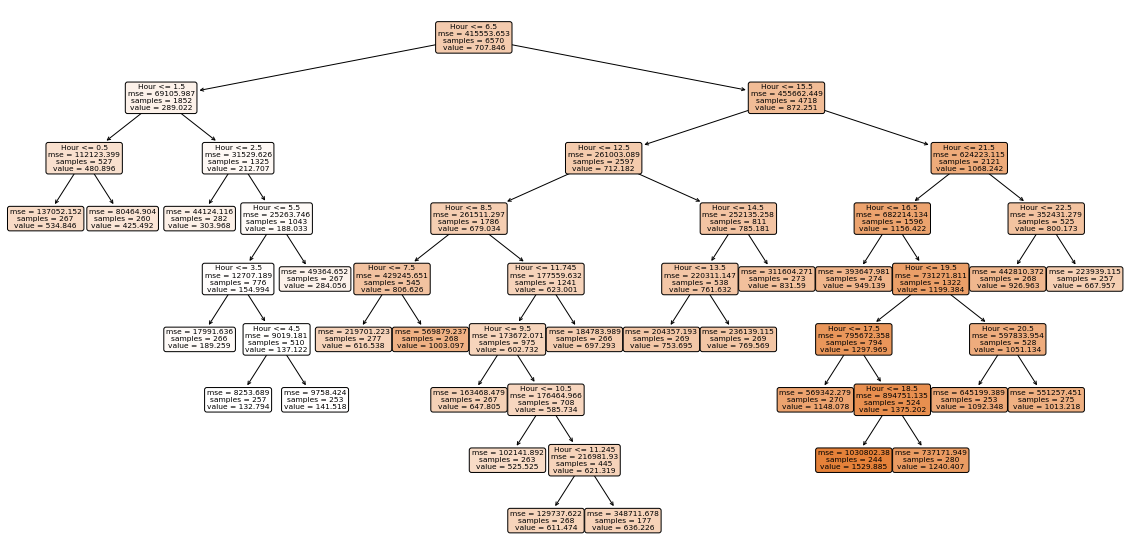

In [88]:
plt.subplots(figsize = (20,10))
plot_tree(dt, 
               feature_names=['Hour'],  
               filled=True,
               rounded = True)
plt.show()

In [89]:
vals = [4.0,5,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,22.5]

In [90]:
rss1 = []
rss2 = []
for val in vals:
    mean = df[df['Hour'] < val]['Rented Bike Count'].mean()
    rss = ((df[df['Hour'] < val]['Rented Bike Count'] - mean)** 2).sum()
    rss1.append(rss)
    mean = df[df['Hour'] >= val]['Rented Bike Count'].mean()
    rss = ((df[df['Hour'] >= val]['Rented Bike Count'] - mean)** 2).sum()
    rss2.append(rss)

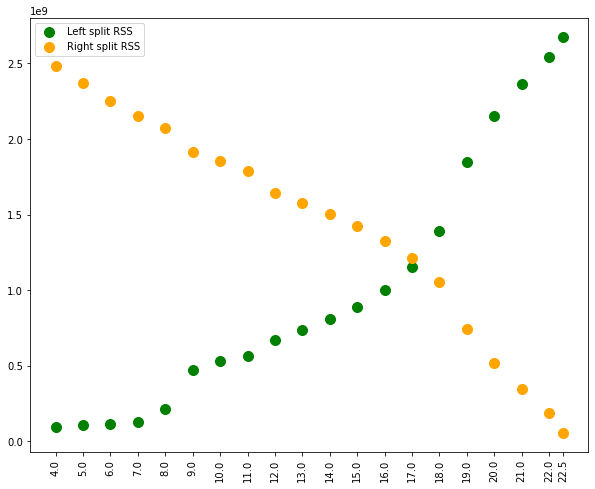

In [91]:
#It is taking approx 1 mins to execute this cell

%matplotlib inline

plt.subplots(figsize = (10, 8))
plt.scatter(vals, rss1, label = 'Left split RSS', s= 100, c = 'g')
plt.scatter(vals, rss2, label = 'Right split RSS', s = 100, c = 'orange')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [92]:
rss1 = np.array(rss1)
rss2 = np.array(rss2)

cost = []
index = 0
for val in vals:
    left = df[df['Hour'] < val].shape[0]/df.shape[0]
    right = df[df['Hour'] >= val].shape[0]/df.shape[0]
    cost.append(left*rss1[index] + right*rss2[index])
    index += 1

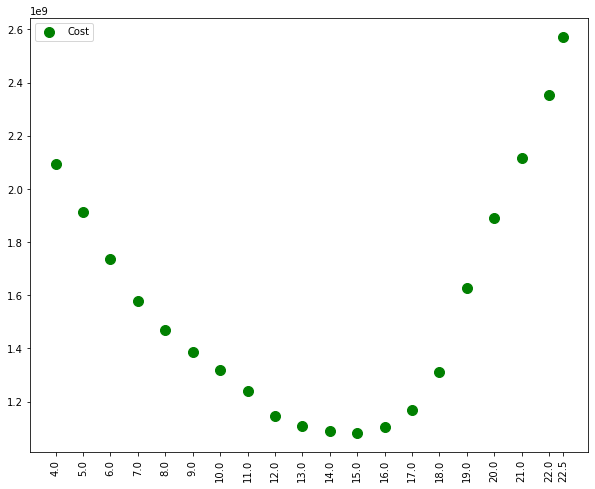

In [93]:
#It is taking approx 1 mins to execute this cell

%matplotlib inline

plt.subplots(figsize = (10, 8))
plt.scatter(vals, cost, label = 'Cost', s= 100, c = 'g')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [94]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_tree, y_tree, random_state= 0)

scaler = StandardScaler()
scaler.fit(X_train_orig)
X_train = scaler.transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

In [95]:
dtreg = DecisionTreeRegressor(random_state= 0)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [96]:
print('Train r2-score:', dtreg.score(X_train, y_train))
print('Test r2-score:', dtreg.score(X_test, y_test))

Train r2-score: 1.0
Test r2-score: 0.7077368890801894


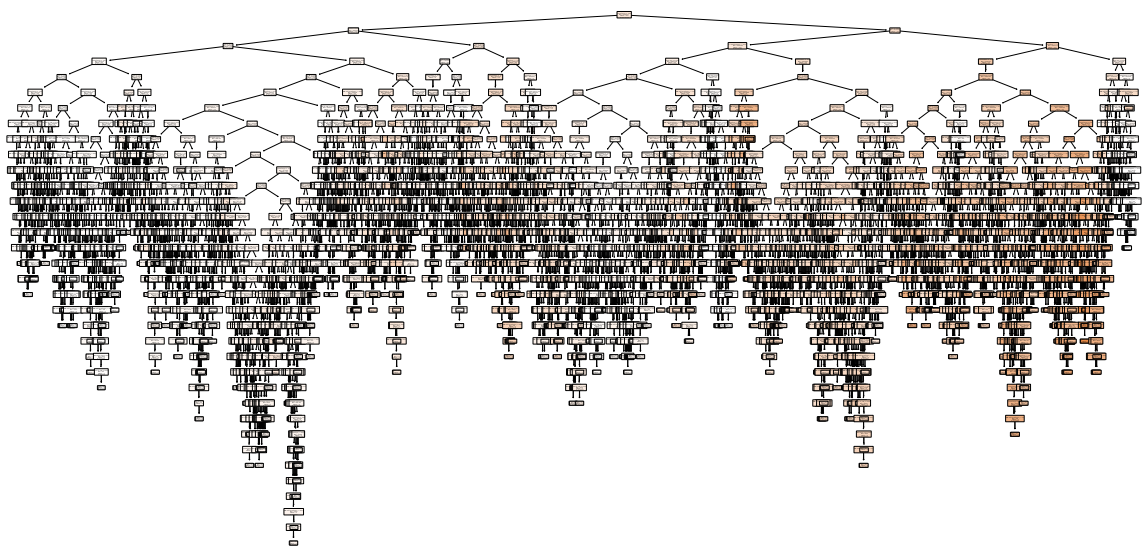

In [97]:
#It is taking approx 2 mins to execute this cell

plt.subplots(figsize = (20, 10))
plot_tree(dtreg, 
               feature_names=X_train_orig.columns,  
              
               filled=True,
               rounded = True)
plt.show()

### Early stopping: max_depth = 2

In [98]:
dtreg = DecisionTreeRegressor(random_state= 0, max_depth = 2)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

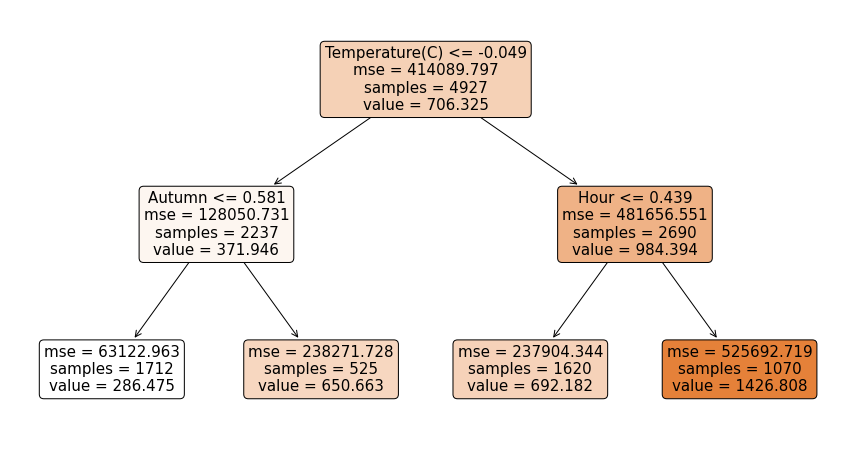

In [99]:
plt.subplots(figsize = (15, 8))
plot_tree(dtreg, 
               feature_names=X_train_orig.columns,  
               filled=True,
               rounded = True)
plt.show()

In [100]:
X_tree.shape

(6570, 15)

In [101]:
new_observation = pd.DataFrame(X_test, columns= X_tree.columns).iloc[0]
dtreg.predict([new_observation])

array([692.18209877])

# Regression Model Prediction

In [102]:
#Test data set choosed with mimmax scaler after removing the multicolinear columns 

Xt = minmax_dft.drop(['Spring', 'Summer', 'Snowfall (cm)'],axis = 1)

# 3- Predict and evaluate 
y_pred = lreg.predict(X) #Using the model trained the muliple columns with 90% train data
yt_pred = lreg.predict(Xt)# Prediction for the test data

#Prediction score
print('score:', lreg.score(X,y))


score: 0.5331853477283591


### Error Evaluation

In [103]:
# mean_squared_error(actual, predicted)
np.sqrt(mean_squared_error(y, y_pred))

440.43902439513005

In [104]:
mean_squared_error(y, y_pred)

193986.53421013395

In [105]:
# mean_absolute_error(actual, predicted)
mean_absolute_error(y, y_pred)

329.1109147838864

In [106]:
#r2_score(actual, predicted)
r2_score(y, y_pred)

0.5331853477283591

## Summary : 

#### Model Evaluation and Model Prediction : 

#### Statistical Approach : Using Ordinary Least Squares method ,

--> Used all the feature columns in the OLS method which has resulting adjusted r value - 0.531
--> Upon Looking at the model summary few columns has multi-collinearity .So,dropped these columns. To Avoid overfitting.

Columns Dropped:
        -->'Spring', 'Summer', 'Snowfall (cm)' 
        
-->After dropping the above 3 columns OLS is performed again and found the adjusted r-value as 0.532.

#### Feature Selection : Used the columns that has p < 0.05 significance level

The features used to train and test and predict are as below 


•	Hour
•	Temperature(C)
•	Humidity(%)
•	Wind speed (m/s)
•	Visibility (10m) 
•	Dew point temperature(C)
•	Solar Radiation (MJ/m2) 
•	Rainfall(mm) 
•	Holiday 
•	Functioning Day
•	Autumn 
•	Winter



#### Machine learning Approach :  LInear Regressor Used to predict the test data target column.

Below is the reasons specifie to choose the linear regressor upon SGD regressor.

Using the above list of columns model is trained with [70,30],[80,20] and [90,10].

Model trained with 90% of train data has better validation score compared to others.

##### Linear Regression : Has a better test and train validation scores on the scaled data.

Methods used : 

Simple linear regression -  Temperature as the feature column
Multiple linear regression - using the columns with high correlation 'Temperature(C)','Hour','Dew point temperature(C)'.

##### SGD Regressor : Has a similar results slightly less than the linear regression with different learning rates [0.01, 0.001, 0.0001, 0.0001, 0.00001] as observed above with graph. There is no better performance . 
This method has sighly higher metrics compared to linear regression.

#### Decision Regressor : Using this model the test and train scores are 1.0 and  0.70 respectively . As the train and test scores has wide difference the model is underfitting . So, this is not choosen


So,we have used the Linear regression from the sklearn package to predict the values of the test dataset with the prediction score ~0.53 for both validation and training set.

Used the metrics package to define the MSE,MAE,R2-scores. Those scores for this model are comparetively low from the other models

	Simple Linear Regression	Mulivariate -1	Multivariate -2 	SGD Regressor	OLS Method
RMSE	554.09	                571.68	        440.4	             457.08	         NA
MSE	    307018.87	            326828.52	    193961.32	         208929.21	     NA
MAE	    413.51	                436.33	        329.04	             336.62	         NA
R2-score 0.28	                0.23	        0.53	             0.53	          0.52!

From the above table Multivate - 2 has better Metrics thatn all other .

So,we have choosed the Multivariate - 2 with the columns listed above to predict the Target column in the test dataset.

# Classification

### Data preparation

In [107]:
#File gets uploaded and can be seen in the form of dataframe with index starting from 0.

#train dataset
clasDf_train = pd.read_csv("train_classification.csv")

#test dataset
clasDf_test = pd.read_csv("test_classification.csv")

In [108]:
#To get only top 5 rows of the dataframe, we need to use head().
clasDf_train.head()

Age Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL  CREA   GGT  PROT  \
0   39   f  46.4   59.2  14.1   18.9   4.5   7.90  4.55  61.0  14.5  77.3   
1   37   m  46.1   44.3  42.7   26.5   6.4  10.86  5.05  74.0  22.2  73.1   
2   32   m  50.9   65.5  23.2   21.2   6.9   8.69  4.10  83.0  13.7  71.3   
3   46   f  36.7   62.3  10.8   17.4   3.7   6.17  4.07  67.0  15.1  69.0   
4   56   m  23.0  105.6   5.1  123.0  43.0   1.80  2.40  62.7  35.9  62.8   

        Category  
0  0=Blood Donor  
1  0=Blood Donor  
2  0=Blood Donor  
3  0=Blood Donor  
4    3=Cirrhosis

In [109]:
clasDf_test.head()
#It is observed that, train and test data has same feature set but target column is not present in test dataset. 

Age Sex   ALB   ALP   ALT   AST  BIL    CHE  CHOL   CREA    GGT  PROT
0   36   m  47.8  89.0  48.5  38.4  8.6   8.26  5.62   96.0   21.9  76.2
1   56   f  45.1  79.1  39.0  30.5  5.2   6.47  5.10   64.0  145.3  66.7
2   51   m  45.9  66.7  31.8  28.1  9.0  10.08  5.61   85.0   36.2  73.0
3   55   m  44.7  71.6  22.9  22.1  5.5   6.82  4.61  105.0   59.2  72.7
4   45   m  43.2  68.2  27.8  42.3  6.6  10.93  6.61  105.0   27.2  74.5

### VISUALIZATIONS TO UNDERSTAND DATA FROM DATASET BEFORE DATA TRANSFORMATION

### Shape of the dataset

In [110]:
#shape is used to know the number of rows and columns present in the dataset.
print("Train dataset shape : ", clasDf_train.shape)
print("Test dataset shape : ", clasDf_test.shape)

Train dataset shape :  (553, 13)
Test dataset shape :  (62, 12)


### Describe function

In [111]:
#To know the descriptive statistics of the dataframe, describe is used. 
clasDf_train.describe()

#From this statictics, we can see the mean, standard deviation, minimum value and maximum value of the attribute.
#By using this, we can get overview of the structure of data.

Age         ALB         ALP         ALT         AST         BIL  \
count  553.000000  552.000000  536.000000  552.000000  553.000000  553.000000   
mean    47.459313   41.641123   67.962127   28.574457   34.576492   11.314828   
std     10.202420    5.843118   26.643695   25.308527   30.292877   18.839697   
min     19.000000   14.900000   11.300000    0.900000   10.600000    1.800000   
25%     39.000000   38.875000   52.275000   16.475000   21.700000    5.400000   
50%     47.000000   42.000000   65.550000   23.000000   26.200000    7.300000   
75%     55.000000   45.225000   80.125000   33.200000   33.000000   11.500000   
max     77.000000   82.200000  416.600000  325.300000  319.800000  254.000000   

              CHE        CHOL        CREA         GGT        PROT  
count  553.000000  544.000000  553.000000  553.000000  552.000000  
mean     8.170253    5.360809   79.782098   38.938336   71.962500  
std      2.196384    1.123139   30.358409   53.895354    5.506352  
min      1.420000    1.430000    8.000000    4.500000   44.800000  
25%      6.940000    4.617500   67.000000   15.800000   69.200000  
50%      8.180000    5.300000   77.000000   23.300000   72.000000  
75%      9.570000    6.060000   88.000000   40.100000   75.325000  
max     16.410000    9.670000  519.000000  650.900000   90.000000

In [112]:
#descriptive statistics for test dataset
clasDf_train.describe()

Age         ALB         ALP         ALT         AST         BIL  \
count  553.000000  552.000000  536.000000  552.000000  553.000000  553.000000   
mean    47.459313   41.641123   67.962127   28.574457   34.576492   11.314828   
std     10.202420    5.843118   26.643695   25.308527   30.292877   18.839697   
min     19.000000   14.900000   11.300000    0.900000   10.600000    1.800000   
25%     39.000000   38.875000   52.275000   16.475000   21.700000    5.400000   
50%     47.000000   42.000000   65.550000   23.000000   26.200000    7.300000   
75%     55.000000   45.225000   80.125000   33.200000   33.000000   11.500000   
max     77.000000   82.200000  416.600000  325.300000  319.800000  254.000000   

              CHE        CHOL        CREA         GGT        PROT  
count  553.000000  544.000000  553.000000  553.000000  552.000000  
mean     8.170253    5.360809   79.782098   38.938336   71.962500  
std      2.196384    1.123139   30.358409   53.895354    5.506352  
min      1.420000    1.430000    8.000000    4.500000   44.800000  
25%      6.940000    4.617500   67.000000   15.800000   69.200000  
50%      8.180000    5.300000   77.000000   23.300000   72.000000  
75%      9.570000    6.060000   88.000000   40.100000   75.325000  
max     16.410000    9.670000  519.000000  650.900000   90.000000

**Seaborn is one of the python data visualization library based on matplotlib. Seaborn helps to understand data with the help of charts and graphs. In our project, we have used seaborn to analyze the data of attribute "Sex" which gives the count of male and female present in the given dataset.**

**Data visualization for train dataset and test dataset**

##### 1.Count plot 
        Count plot is used to retrive count of values present in that particular column
##### 2.Hist plot
        To understand the underlying frequency distribution, hist plot is drawn
##### 3.Heat Map
        To determine correlation between columns present in the dataset

**Train dataset visualizations**

Text(0.5, 1.0, 'Count of male and female')

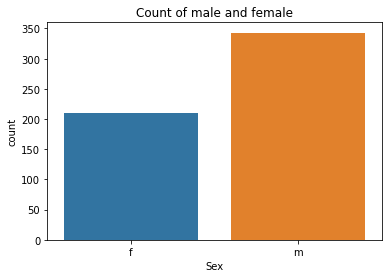

In [113]:
sns.countplot(x="Sex",data=clasDf_train)
plt.title("Count of male and female")

#This visualization concludes that count of male is more than female
#Similaily we can find the statistics of more attributes using this library

Text(0.5, 1.0, "Visualization of 'age' attribute")

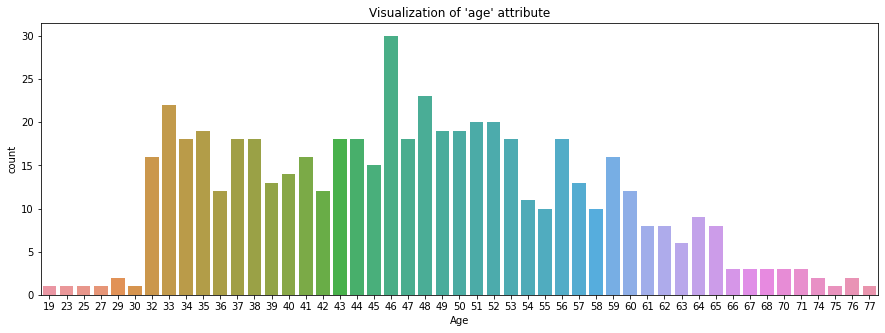

In [114]:
#Here, we are analyzing the column 'age' with the help of visualizations using seaborn and matplotlib

plt.figure(figsize =(15,5))
sns.countplot(x="Age",data=clasDf_train)
plt.title("Visualization of 'age' attribute")

#This visualization shows us that persons with age 46 are more in number. Similiarly we can find all ages. 

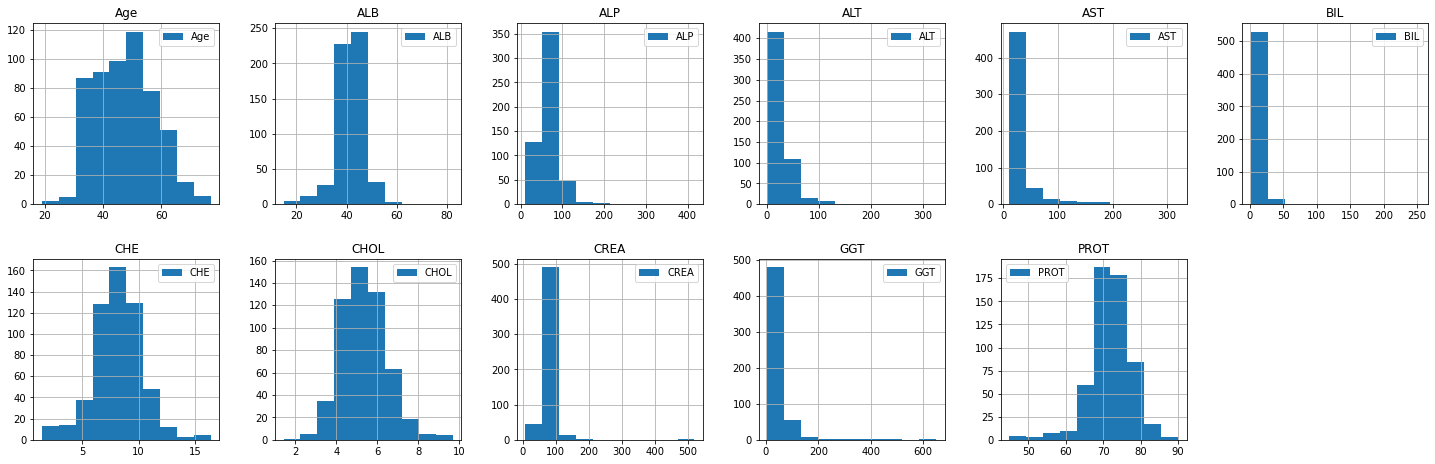

In [115]:
histPlot = clasDf_train.hist(figsize=(25,25),layout=(6,6),legend = True)

<AxesSubplot:>

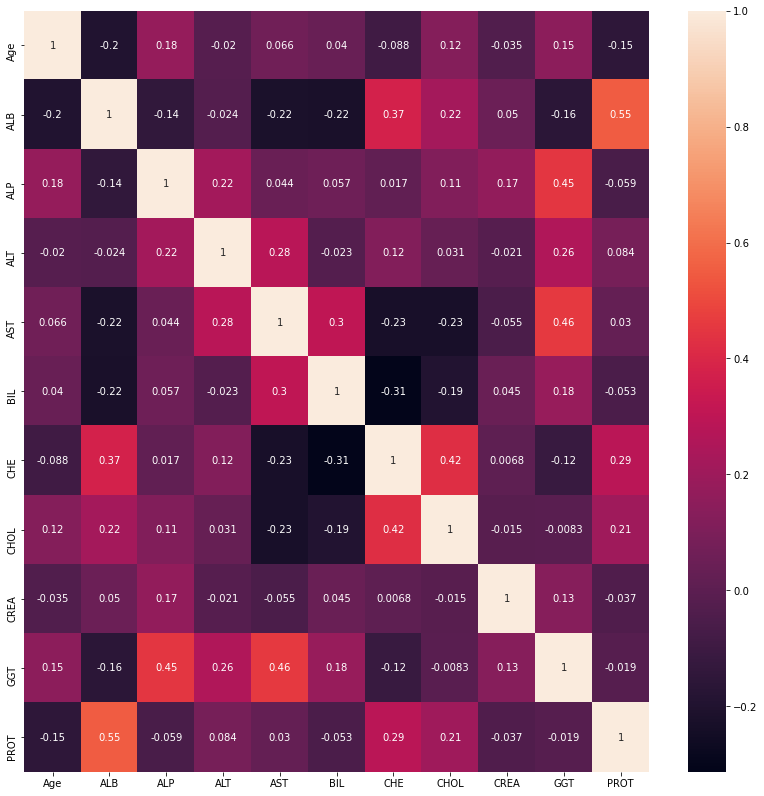

In [116]:
plt.figure(figsize=(14,14))
correlation=clasDf_train.corr()
sns.heatmap(correlation,annot=True)

**Test dataset visualizations**

Text(0.5, 1.0, 'Count of male and female')

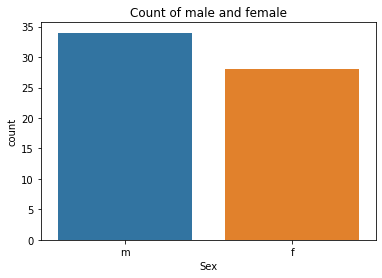

In [117]:
sns.countplot(x="Sex",data=clasDf_test)
plt.title("Count of male and female")

#We can observe that count of male is more than female from the visualization

Text(0.5, 1.0, "Visualization of 'age' attribute")

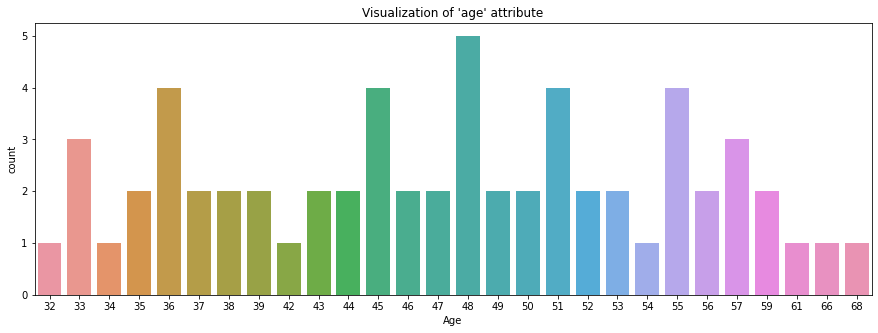

In [118]:
plt.figure(figsize =(15,5))
sns.countplot(x="Age",data=clasDf_test)
plt.title("Visualization of 'age' attribute")


#This visualization shows us that persons with age 48 are more in number. Similiarly we can find all ages. 

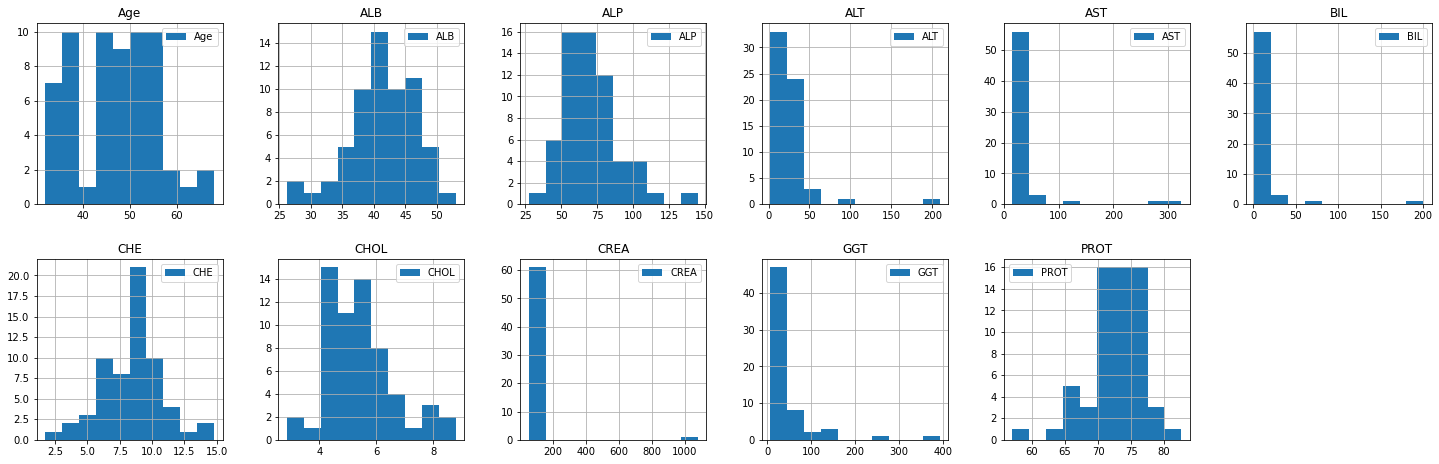

In [119]:
histPlot = clasDf_test.hist(figsize=(25,25),layout=(6,6),legend = True)

<AxesSubplot:>

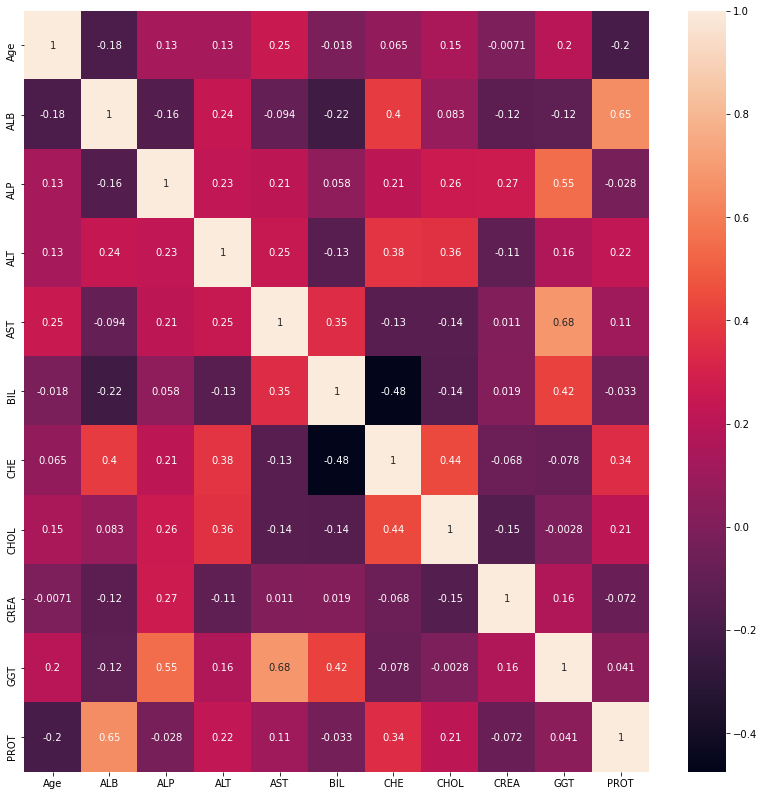

In [120]:
plt.figure(figsize=(14,14))
correlation=clasDf_test.corr()
sns.heatmap(correlation,annot=True)

**DATA TRANSFORMATION**

    Data which is not numerical need to be transformed to numerical for performing classification.




**Replacing the binomial columns to Numeric data in train dataset**

In [121]:
print("Before data transformation, value counts of column 'Sex'")
clasDf_train['Sex'].value_counts()

Before data transformation, value counts of column 'Sex'


m    343
f    210
Name: Sex, dtype: int64

In [122]:
# replace the more rows with 1 and less rows with 0
clasDf_train['Sex'].replace({'m':1,'f':0},inplace = True)

In [123]:
print("Before data transformation, value counts of column 'Sex'")
clasDf_train['Sex'].value_counts()

Before data transformation, value counts of column 'Sex'


1    343
0    210
Name: Sex, dtype: int64

**Applying label encoding for target column to transform it into numerical values**

In [124]:
print("Before data transformation, value counts of column 'Category'")
clasDf_train['Category'].value_counts()

Before data transformation, value counts of column 'Category'


0=Blood Donor             478
3=Cirrhosis                26
1=Hepatitis                22
2=Fibrosis                 21
0s=suspect Blood Donor      6
Name: Category, dtype: int64

In [125]:
#label encoder is used to transform nominal data into numberical. 
#Here, Category column is target column, so we cannot perform one hot vector which results in more than 1 column.
#This may be tough for us during model development. So we perform label encoding for this column.

labelencoder = LabelEncoder()
clasDf_train['Category']= labelencoder.fit_transform(clasDf_train['Category'])
print("After data transformation, value counts of column 'Category'")
clasDf_train['Category'].value_counts()

After data transformation, value counts of column 'Category'


0    478
4     26
2     22
3     21
1      6
Name: Category, dtype: int64

In [126]:
#Now all the columns in the train dataset are numberical.
clasDf_train.head()

Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL  CREA   GGT  PROT  \
0   39    0  46.4   59.2  14.1   18.9   4.5   7.90  4.55  61.0  14.5  77.3   
1   37    1  46.1   44.3  42.7   26.5   6.4  10.86  5.05  74.0  22.2  73.1   
2   32    1  50.9   65.5  23.2   21.2   6.9   8.69  4.10  83.0  13.7  71.3   
3   46    0  36.7   62.3  10.8   17.4   3.7   6.17  4.07  67.0  15.1  69.0   
4   56    1  23.0  105.6   5.1  123.0  43.0   1.80  2.40  62.7  35.9  62.8   

   Category  
0         0  
1         0  
2         0  
3         0  
4         4

**Data transformation for test data**

In [127]:
print("Before data transformation, value counts of column 'Sex'")
clasDf_test['Sex'].value_counts()

Before data transformation, value counts of column 'Sex'


m    34
f    28
Name: Sex, dtype: int64

In [128]:
# replace the more rows with 1 and less rows with 0
clasDf_test['Sex'].replace({'m':1,'f':0},inplace = True)

In [129]:
print("Before data transformation, value counts of column 'Sex'")
clasDf_test['Sex'].value_counts()

Before data transformation, value counts of column 'Sex'


1    34
0    28
Name: Sex, dtype: int64

In [130]:
#Now all the columns in the test dataset are numberical.
clasDf_test.head()

Age  Sex   ALB   ALP   ALT   AST  BIL    CHE  CHOL   CREA    GGT  PROT
0   36    1  47.8  89.0  48.5  38.4  8.6   8.26  5.62   96.0   21.9  76.2
1   56    0  45.1  79.1  39.0  30.5  5.2   6.47  5.10   64.0  145.3  66.7
2   51    1  45.9  66.7  31.8  28.1  9.0  10.08  5.61   85.0   36.2  73.0
3   55    1  44.7  71.6  22.9  22.1  5.5   6.82  4.61  105.0   59.2  72.7
4   45    1  43.2  68.2  27.8  42.3  6.6  10.93  6.61  105.0   27.2  74.5

### Missing Values

In [131]:
#After transforming all the data into numberical, we need to check missing values in the data 
#and need to replace them.
clasDf_train.isna().sum()

#From this, we can see that, there are missing values in 5 columns in train dataset.

Age          0
Sex          0
ALB          1
ALP         17
ALT          1
AST          0
BIL          0
CHE          0
CHOL         9
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64

### KDE Plots analysis and usage of mean or media to fill missing values

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

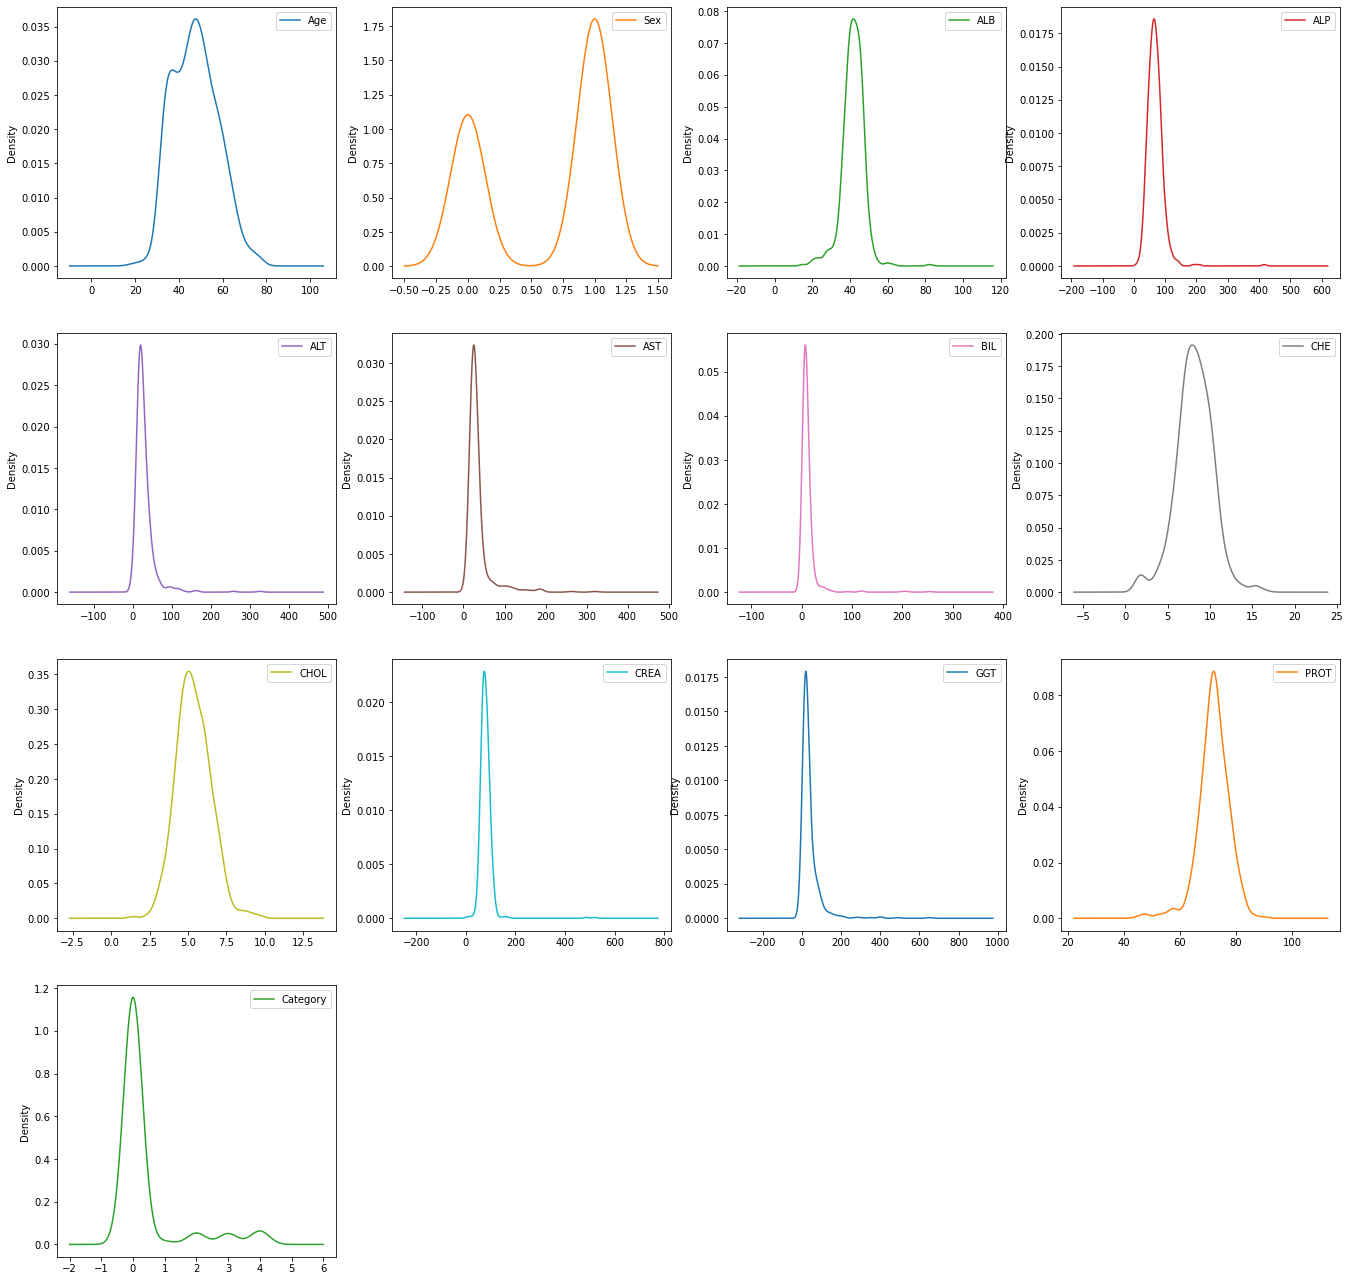

In [132]:
clasDf_train.plot(kind = 'kde' , subplots = True , layout=(4,4), 
              sharex=False, sharey=False, figsize=(23,23))

**From KDE plots, it is observed that for columns 'ALB','ALP','ALT','PROT', data is skewed. so we are replacing null values with its median. For column 'CHOL', there is no skewness, so null values are replaced with mean.**

In [133]:
#Here, based on skewness, we are filling missing values using fillna()
clasDf_train['ALB'].fillna(clasDf_train['ALB'].median(),inplace = True)
clasDf_train['ALP'].fillna(clasDf_train['ALP'].median(),inplace = True)
clasDf_train['ALT'].fillna(clasDf_train['ALT'].median(),inplace = True)
clasDf_train['CHOL'].fillna(clasDf_train['CHOL'].mean(),inplace = True)
clasDf_train['PROT'].fillna(clasDf_train['PROT'].median(),inplace = True)

In [134]:
#crosschecking missing values in dataframe after replacing them. 
clasDf_train.isna().sum()

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

#### Test Data : Using density plots to assesses the distribution of data in the column 

In [135]:
#After transforming all the data into numberical, we need to check missing values in the data 
#and need to replace them.
clasDf_test.isna().sum()

#From this, we can observe that there are missing values in 2 columns.

Age     0
Sex     0
ALB     0
ALP     1
ALT     0
AST     0
BIL     0
CHE     0
CHOL    1
CREA    0
GGT     0
PROT    0
dtype: int64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

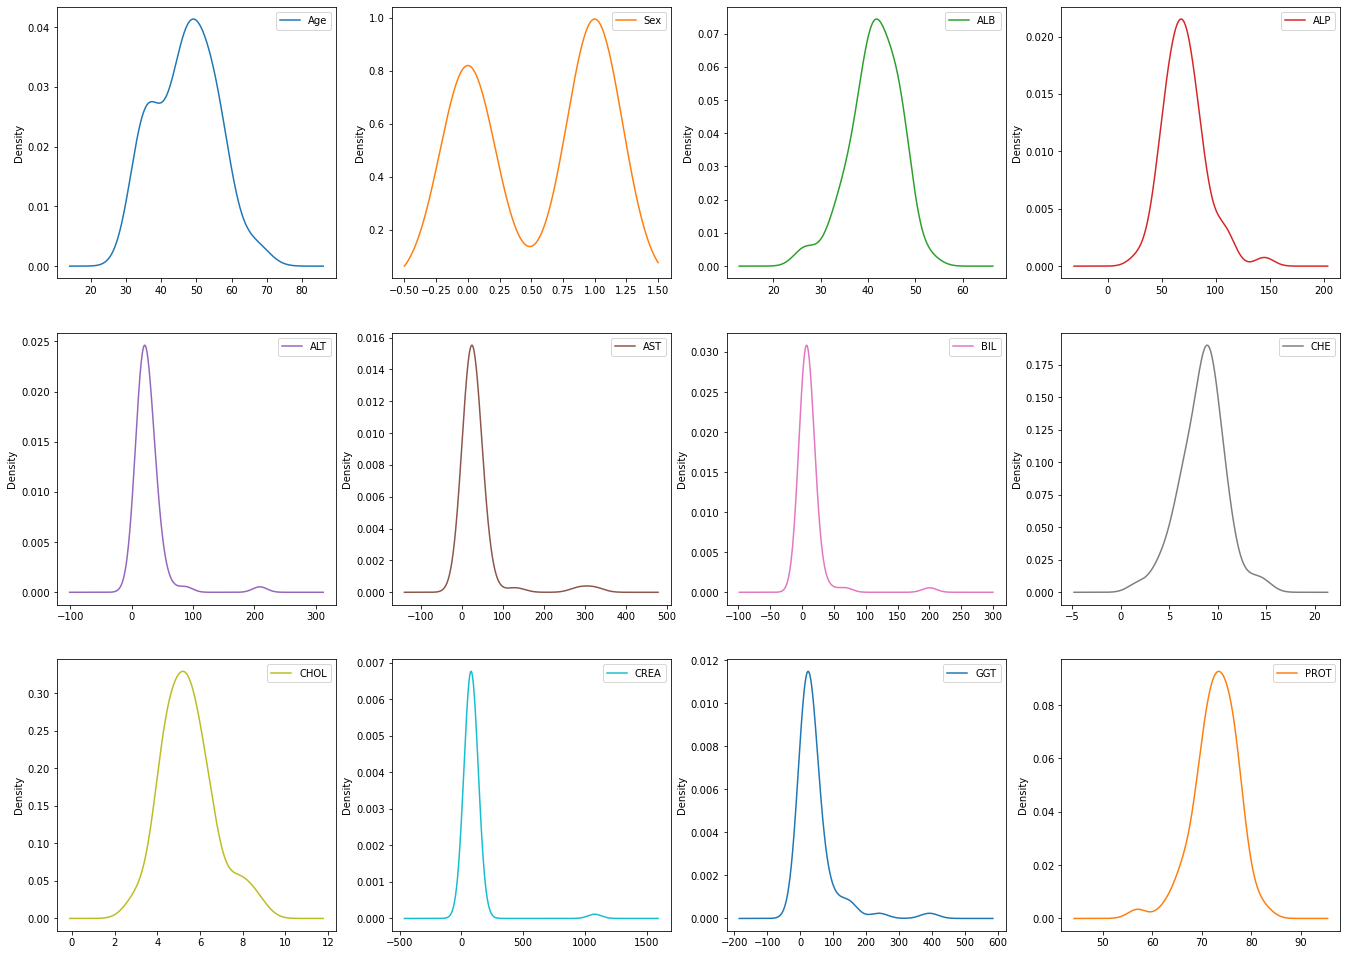

In [136]:
clasDf_test.plot(kind = 'kde' , subplots = True , layout=(4,4), 
              sharex=False, sharey=False, figsize=(23,23))

In [137]:
#Here, based on skewness, we are filling missing values using fillna()

clasDf_test['ALP'].fillna(clasDf_test['ALP'].median(),inplace = True)
clasDf_test['CHOL'].fillna(clasDf_test['CHOL'].mean(),inplace = True)

In [138]:
clasDf_test.isna().sum()

Age     0
Sex     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

### Feature and Target datasets 

Target column is "Category"

In [139]:
clasDf_feature = clasDf_train[clasDf_train.columns[:-1]]
clasDf_target = clasDf_train['Category']

## Scaling Techniques Used

### 1) MinMax Scaling
### 2) Standard Scaling

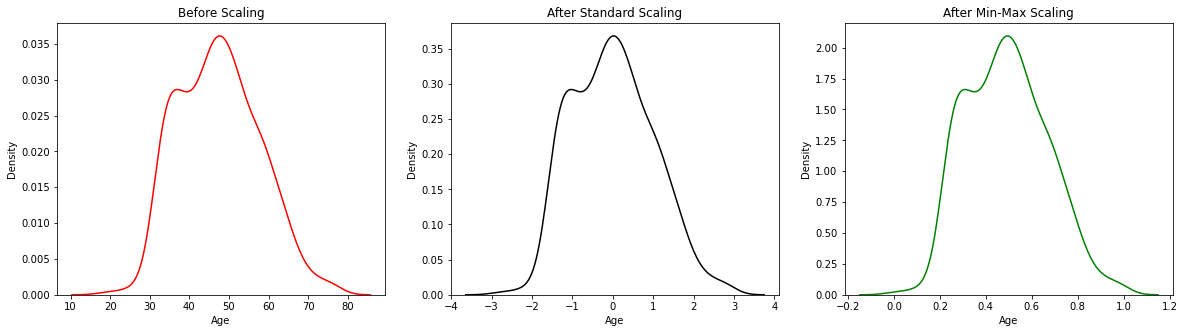

In [140]:
#Applying standard scaling method
scaler = preprocessing.StandardScaler()
clasDfTrain_standScal = scaler.fit_transform(clasDf_feature)
clasDfTrain_standScal = pd.DataFrame(clasDfTrain_standScal, columns =clasDf_feature.columns)
 
#Applying minmax scalar method
scaler_minMax = preprocessing.MinMaxScaler()
clasDfTrain_mmScal = scaler_minMax.fit_transform(clasDf_feature)
clasDfTrain_mmScal = pd.DataFrame(clasDfTrain_mmScal, columns =clasDf_feature.columns)
 
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))

#plotting density graph of column 'age' before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(clasDf_feature['Age'], ax = ax1,color ='r')

#plotting density graph of column 'age' after standard scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(clasDfTrain_standScal['Age'], ax = ax2, color ='black')

#plotting density graph of column 'age' after minmax scaling
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(clasDfTrain_mmScal['Age'], ax = ax3, color ='g')
plt.show()

### Looking at the above graphs plots drawn on top of scaled data , we have choosed - "Min-Max Scaling"
#### Below are the reasons
#### With standard scaling the values turned to be very minute or very large for the given data which in turn creates a problem while clustering. So, we have choosen the min-max scaling technique

In [141]:
# view the train data after scaling
clasDfTrain_mmScal.head()

Age  Sex       ALB       ALP       ALT       AST       BIL       CHE  \
0  0.344828  0.0  0.468053  0.118184  0.040691  0.026843  0.010706  0.432288   
1  0.310345  1.0  0.463596  0.081421  0.128853  0.051423  0.018239  0.629753   
2  0.224138  1.0  0.534918  0.133728  0.068742  0.034282  0.020222  0.484990   
3  0.465517  0.0  0.323923  0.125833  0.030518  0.021992  0.007534  0.316878   
4  0.637931  1.0  0.120357  0.232667  0.012947  0.363519  0.163362  0.025350   

       CHOL      CREA       GGT      PROT  
0  0.378641  0.103718  0.015470  0.719027  
1  0.439320  0.129159  0.027382  0.626106  
2  0.324029  0.146771  0.014233  0.586283  
3  0.320388  0.115460  0.016399  0.535398  
4  0.117718  0.107045  0.048577  0.398230

**Scaling test dataset using minmax scaler**

In [142]:
#Scaling for test dataset
clasDfTest_mmScal = scaler.fit_transform(clasDf_test)
clasDfTest_mmScal = pd.DataFrame(clasDfTest_mmScal, columns = clasDf_test.columns)

In [143]:
# view the data after scaling
clasDfTest_mmScal.head()

Age       Sex       ALB       ALP       ALT       AST       BIL  \
0 -1.270491  0.907485  1.226938  0.921340  0.788168  0.033712 -0.136051   
1  1.049699 -1.101946  0.706569  0.412231  0.434144 -0.119177 -0.267187   
2  0.469651  0.907485  0.860752 -0.225441  0.165832 -0.165624 -0.120623   
3  0.933689  0.907485  0.629478  0.026542 -0.165832 -0.281742 -0.255616   
4 -0.226406  0.907485  0.340384 -0.148304  0.016770  0.109188 -0.213190   

        CHE      CHOL      CREA       GGT      PROT  
0 -0.075641  0.155349  0.010102 -0.377284  0.796253  
1 -0.863127 -0.276903 -0.242006  1.652334 -1.409735  
2  0.725044  0.147036 -0.076560 -0.142085  0.053183  
3 -0.709149 -0.684216  0.081008  0.236207 -0.016479  
4  1.098990  0.978289  0.081008 -0.290112  0.401497

## Clustering

    1. Agglomerative clustering
    2. K means Clustering

#### Agglomerative clustering

    It is an unsupervised machine learning hierarchical clustering algorithm. It seperates the data into clusters in bottom up approach. Based on dendogram, we can analyze the clusters.

In [144]:
agModel = AgglomerativeClustering(distance_threshold = 15, n_clusters = None, linkage = 'ward')

# Train the model
agModel = agModel.fit(clasDfTrain_mmScal)
agModel.n_clusters_

2

In [145]:
#We can see the values of 0s and 1s in the output since we got 2 clusters. 
#0 represents the points that belong to the first cluster and 1 represents points in the second cluster.

agCluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agCluster.fit_predict(clasDfTrain_mmScal)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

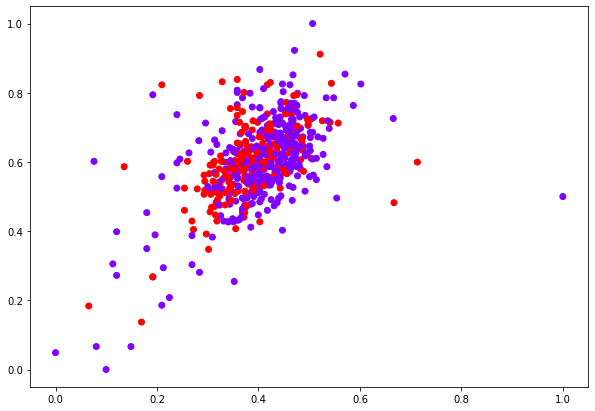

In [146]:
plt.figure(figsize=(10, 7))  
plt.scatter(clasDfTrain_mmScal['ALB'], clasDfTrain_mmScal['PROT'], c=agCluster.labels_, cmap='rainbow')

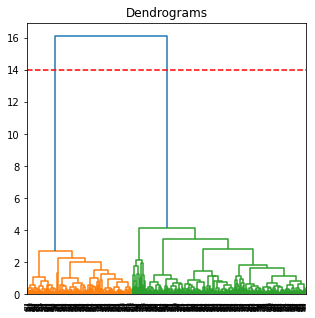

In [147]:
plt.subplots(figsize = (5,5))
plt.title("Dendrograms")
dendrogram(linkage(clasDfTrain_mmScal, method = 'ward'))
plt.axhline(y = 14, c = 'r', linestyle = '--')

plt.show()

**By seeing the above dendogram, we can summerize that, most of the data is clustered into green colured cluster and rest with orange coloured cluster. Red line at number 14 is y line, which cuts the dendogram and results in number of clusters. Blue line combines that two clusters into one as it is bottom up approach.**

### K means clustering
    
    K means is an unsupervised algorithm which divides the data into k number of clusters. This K value can be determined by using Elbow method.

**Elbow method**

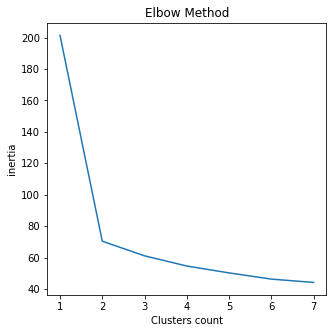

In [148]:
#implementing elbow method
inertia=[]
from sklearn.cluster import KMeans
for i in range(1,8):
    kmeans = KMeans(n_clusters = i,init ='k-means++', random_state =0)
    kmeans.fit(clasDfTrain_mmScal)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,8), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters count')
plt.ylabel('inertia')
plt.show()

**By using this Elbow graph, we can determine the value of K. i.e; optimal value of K. Here, from above figure, we can see that graph is distorting at value 2. Which clearly says that value of K is 2.**

#### Silhouette score
    
    We can also predict the optimal value of K by using Silhouette score. The more the score, the best the cluster value.

In [149]:
for i in range(2,8):
    Kmean_cluster = KMeans(n_clusters = i , random_state = 0)  
    
    Kmean_cluster.fit(clasDfTrain_mmScal)
    
    Kmean_label = Kmean_cluster.labels_
    
    Kmean_count = np.bincount(Kmean_label)
    print(Kmean_count)
    print(f'Silhoutte score for cluster {i} and test data is ' + 
          str(silhouette_score(clasDfTrain_mmScal, Kmean_cluster.labels_)))

[210 343]
Silhoutte score for cluster 2 and test data is 0.5976122524066481
[226 210 117]
Silhoutte score for cluster 3 and test data is 0.38512532393513005
[170 210  26 147]
Silhoutte score for cluster 4 and test data is 0.3664357919664037
[170 114  26 147  96]
Silhoutte score for cluster 5 and test data is 0.21421145511661685
[111 114  24 106  96 102]
Silhoutte score for cluster 6 and test data is 0.20242201005694657
[106  71  23 102 112  38 101]
Silhoutte score for cluster 7 and test data is 0.19939855655467512


**By analyzing the score of clusters from 2 to 8, we can conclude that the value of K is 2.** 

In [150]:
ckmeans = KMeans(n_clusters = 2,init ='k-means++', random_state =0)
ckmeans.fit(clasDfTrain_mmScal)
ckmeans.transform(clasDfTrain_mmScal)

array([[0.24512303, 1.02970636],
       [1.04652999, 0.26516364],
       [1.06271974, 0.33876916],
       ...,
       [0.24568382, 1.04129543],
       [1.00849811, 0.11739699],
       [1.27400237, 0.7753272 ]])

In [151]:
#SSE is defined as the sum of the squared distance between centroid and each member of the cluster
print ('final value of the sum of squared errors is: {:.4f}'.format(ckmeans.inertia_))

final value of the sum of squared errors is: 70.3710


In [152]:
Kmeans=KMeans(n_clusters=2)
col=["ALB","ALP","ALT","AST","BIL","CHE","CHOL","CREA","GGT","PROT"]
Kmeans.fit(clasDfTrain_mmScal[col])
new_value = Kmeans.predict(clasDfTrain_mmScal[col])
centers=Kmeans.cluster_centers_
centersDf = pd.DataFrame(centers, columns=col )
print ("centers values are:")
print(centersDf)
clasDfTrain_mmScal["new_cluster"]=new_value

centers values are:
        ALB       ALP       ALT       AST       BIL       CHE      CHOL  \
0  0.422748  0.141669  0.090956  0.067752  0.028619  0.518208  0.525969   
1  0.344725  0.135374  0.073513  0.097833  0.056602  0.309632  0.375648   

       CREA       GGT      PROT  
0  0.141019  0.047261  0.637850  
1  0.139344  0.065744  0.524459  


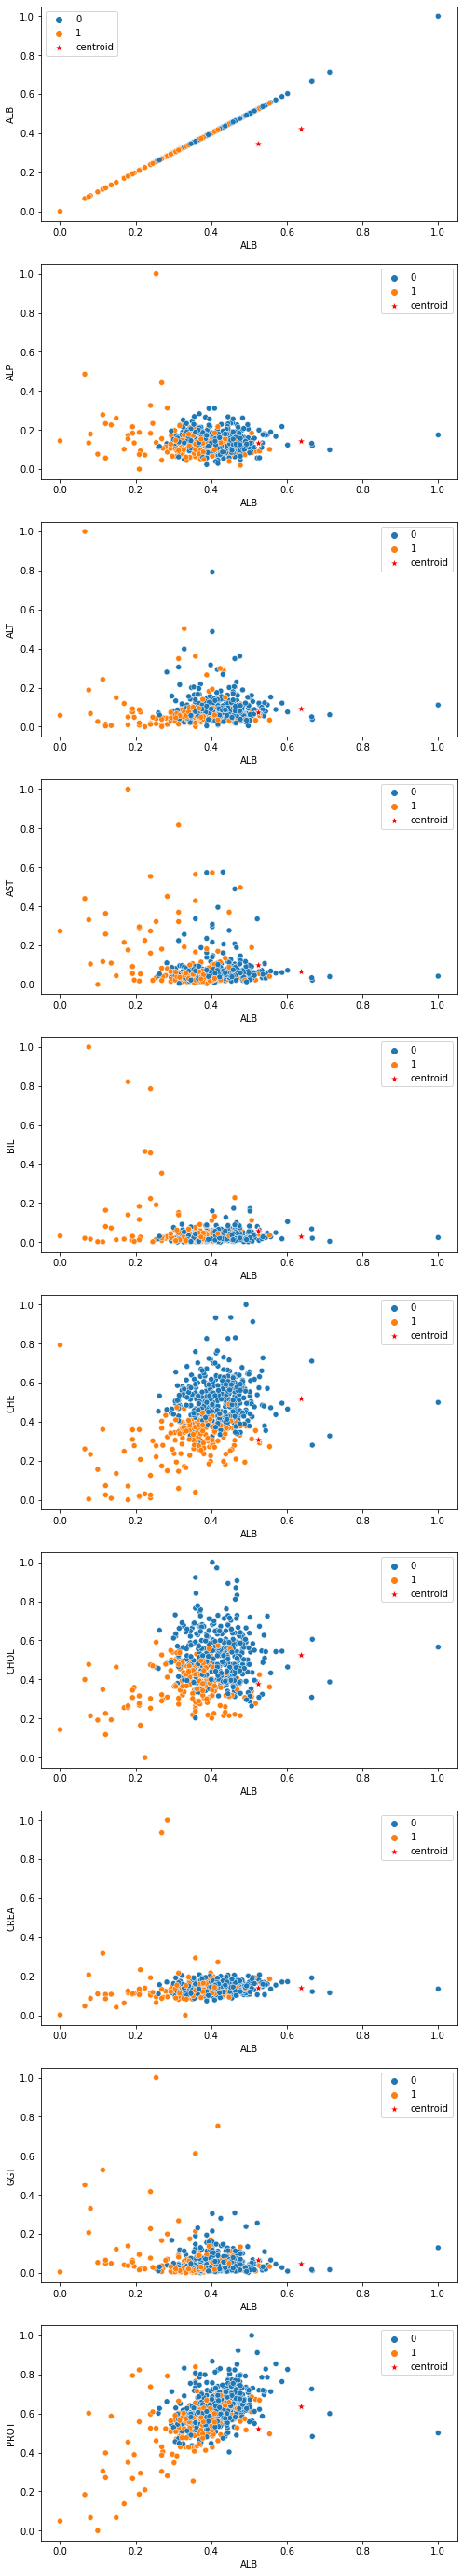

In [153]:
fig, ax = plt.subplots(10,1,figsize=(8,50))
for x,y in enumerate(col):
    sns.scatterplot('ALB',y,hue="new_cluster",data = clasDfTrain_mmScal,ax=ax[x])
    sns.scatterplot('PROT', y,color='red',s =90, marker="*",data=centersDf,
                    label = 'centroid', ax=ax[x])

**From the above visualizations, we can get cluster analysis of each columns in respect to other columns and their centroids are marked. (Centroids are represented in red colour)**

In [154]:
#Cluster centers are
ckmeans.cluster_centers_

array([[ 4.98193760e-01, -1.11022302e-15,  3.84193023e-01,
         1.41909579e-01,  7.08516822e-02,  5.85412431e-02,
         2.35772818e-02,  4.21007656e-01,  4.83705995e-01,
         1.23778772e-01,  3.93475955e-02,  5.97576907e-01],
       [ 4.86076204e-01,  1.00000000e+00,  4.05408098e-01,
         1.38218172e-01,  9.41113983e-02,  8.91777520e-02,
         4.63905966e-02,  4.68261640e-01,  4.72958627e-01,
         1.50695201e-01,  6.18054152e-02,  6.03001883e-01]])

In [155]:
#labels of clusters
ckmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

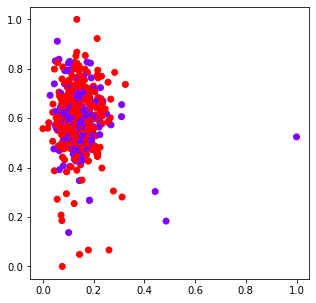

In [156]:
#visualize the clustering data on 2 columns 
plt.figure(figsize=(5, 5))  
plt.scatter(clasDfTrain_mmScal['ALP'], clasDfTrain_mmScal['PROT'], c=ckmeans.labels_, cmap='rainbow')

In [157]:
clasDfTrain_mmScal.drop('new_cluster',axis = 1 , inplace = True)

## Classification model training
        Logistic Regression
        Multinomial Logistic Regression
        Decision Trees

### Logistic Regression

#### Model trainining with 70% as train data and 30% as test data.

In [158]:
#taking feature set as all columns in the dataset expect target column
X = clasDf_train[clasDf_train.columns[:-1]]

#considering target column as y
y = clasDf_train[clasDf_train.columns[-1]]

In [159]:
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, random_state = 0, test_size = 0.3)
#scaling the splitted data using minmax scaler
scaler = MinMaxScaler()
X_train70 = scaler.fit_transform(X_train70)
X_test30 = scaler.transform(X_test30)

In [160]:
#developing logistic regression model 
lr = LogisticRegression(random_state= 0)
lr.fit(X_train70, y_train70)

LogisticRegression(random_state=0)

In [161]:
#model score of train and test data
print('train score:', lr.score(X_train70, y_train70))
print('test score:', lr.score(X_test30, y_test30))

#By analyzing the score, we can say that the model is well worked with both train and test data of the given dataset
#which means, it is not overfitted.

train score: 0.9043927648578811
test score: 0.8734939759036144


#### Model trainining with 75% as train data and 25% as test data.

In [162]:
X_train75, X_test25, y_train75, y_test25 = train_test_split(X, y, random_state = 0, test_size = 0.25)

scaler = MinMaxScaler()
X_train75 = scaler.fit_transform(X_train75)
X_test25 = scaler.transform(X_test25)

In [163]:
lre = LogisticRegression(random_state= 0)
lre.fit(X_train75, y_train75)

LogisticRegression(random_state=0)

In [164]:
print('train score:', lre.score(X_train75, y_train75))
print('test score:', lre.score(X_test25, y_test25))

train score: 0.9009661835748792
test score: 0.8776978417266187


#### Model trainining with 80% as train data and 20% as test data.

In [165]:
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train80 = scaler.fit_transform(X_train80)
X_test20 = scaler.transform(X_test20)
print(X_train80.shape,X_test20.shape, y_train80.shape, y_test20.shape)

(442, 12) (111, 12) (442,) (111,)


In [166]:
lreg = LogisticRegression(random_state= 0)
lreg.fit(X_train80, y_train80)

LogisticRegression(random_state=0)

In [167]:
print('train score:', lreg.score(X_train80, y_train80))
print('test score:', lreg.score(X_test20, y_test20))

train score: 0.9027149321266968
test score: 0.8918918918918919


**Model developed with 70-30 ration of train and test data has higher score with train data when compared to other models. But test score is better with 80-20 ratio model, for which train score is also 90%. So, for further analysis,
we are considering model with 80-20 ration of train and test data.**

In [168]:
#predicting y using test data
ypredTest = lreg.predict(X_test20)
ypredTest

array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0])

In [169]:
# predicting y using train data
ypredTrain = lreg.predict(X_train80)
ypredTrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [170]:
pp = lreg.predict_proba(X_train80)[:,1]

In [171]:
#model score for trained test and untrained test data
lreg.score(X_test20, y_test20)

0.8918918918918919

In [172]:
lreg.predict_proba(X_test20)

array([[9.21406858e-01, 5.86095311e-03, 3.52856088e-02, 2.43681182e-02,
        1.30784615e-02],
       [9.18347355e-01, 3.15741130e-03, 3.22283261e-02, 2.97603382e-02,
        1.65065698e-02],
       [1.40210921e-01, 3.65945816e-02, 1.03983176e-01, 1.92550670e-01,
        5.26660652e-01],
       [8.43261287e-01, 1.11575810e-02, 6.19505537e-02, 4.11723885e-02,
        4.24581900e-02],
       [8.96955518e-01, 4.98732377e-03, 3.10533274e-02, 3.39639529e-02,
        3.30398780e-02],
       [8.99822399e-01, 8.66572367e-03, 4.08970014e-02, 2.41221733e-02,
        2.64927025e-02],
       [9.21329000e-01, 3.64993931e-03, 4.58270681e-02, 2.04206378e-02,
        8.77335495e-03],
       [9.06620528e-01, 8.24896275e-03, 3.49516571e-02, 2.87706731e-02,
        2.14081796e-02],
       [9.08889373e-01, 6.24561200e-03, 3.22188415e-02, 3.82317743e-02,
        1.44143996e-02],
       [8.94969595e-01, 9.78883629e-03, 4.27812900e-02, 3.20941666e-02,
        2.03661119e-02],
       [9.32984863e-01, 6.4460

In [173]:
lreg.predict_proba(X_test20)[:,1]

array([0.00586095, 0.00315741, 0.03659458, 0.01115758, 0.00498732,
       0.00866572, 0.00364994, 0.00824896, 0.00624561, 0.00978884,
       0.006446  , 0.00156998, 0.00667669, 0.0140494 , 0.01453812,
       0.00162136, 0.04300923, 0.00319879, 0.00461298, 0.00498506,
       0.00810245, 0.00195763, 0.00284015, 0.00812162, 0.00307152,
       0.01153607, 0.00559035, 0.0090099 , 0.02152508, 0.04046862,
       0.00291248, 0.00986079, 0.01599487, 0.00741239, 0.00174432,
       0.00674528, 0.00155981, 0.00489524, 0.00773563, 0.00257558,
       0.00453844, 0.0033366 , 0.01402264, 0.00613527, 0.00746432,
       0.03851888, 0.00656298, 0.02004241, 0.00844238, 0.00577798,
       0.00262434, 0.00808271, 0.00690415, 0.01690344, 0.01505976,
       0.00990077, 0.03002733, 0.00473063, 0.00230118, 0.00829411,
       0.00483446, 0.00596605, 0.00175574, 0.07678573, 0.00258748,
       0.01266188, 0.01368873, 0.00597185, 0.0103398 , 0.00314939,
       0.00472986, 0.00695773, 0.00297525, 0.00481166, 0.00560

### Changing the threshold

In [174]:
y_test_predict = np.where(lreg.predict_proba(X_test20)[:,1]> 0.4, 1, 0)
y_test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [175]:
y_test_predict = np.where(lreg.predict_proba(X_test20)[:,1]> 0.6, 1, 0)
y_test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

#### Plotting

In [176]:
X_train80_2 = X_train80[:,[2, 10]]
X_test20_2 = X_test20[:,[2, 10]]

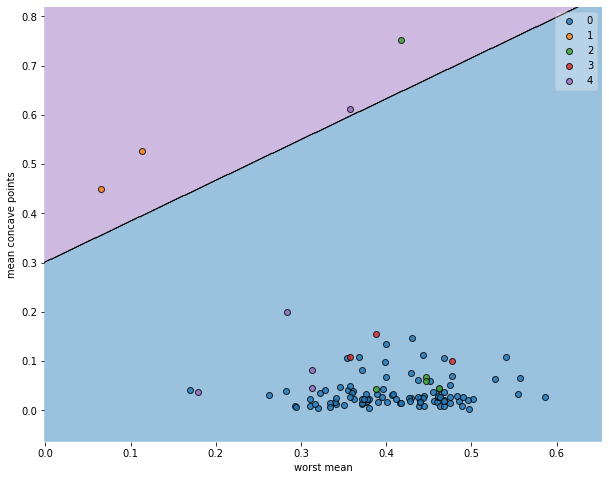

In [177]:
plt.subplots(figsize = (10,8))
lreg = LogisticRegression(random_state = 0)
lreg.fit(X_train80_2, y_train80)

plot_decision_regions(X = X_test20_2 , y = y_test20.to_numpy(), 
                      clf = lreg, markers = 'o',
                      zoom_factor = 15)
plt.xlabel('worst mean')
plt.ylabel('mean concave points')
plt.show()

### Model evaluation
    

In [178]:
print('Train confusion matrix: ')
cmTrain = confusion_matrix(y_train80,ypredTrain)
print(cmTrain)
print('Test confusion matrix: ')
cmTest = confusion_matrix(y_test20,ypredTest)
print(cmTest)

Train confusion matrix: 
[[382   0   0   0   0]
 [  4   0   0   0   0]
 [ 15   0   2   0   0]
 [ 16   0   0   2   0]
 [  8   0   0   0  13]]
Test confusion matrix: 
[[96  0  0  0  0]
 [ 1  0  0  1  0]
 [ 5  0  0  0  0]
 [ 3  0  0  0  0]
 [ 2  0  0  0  3]]


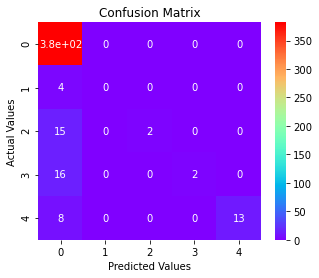

In [179]:
#Confusion matrix plot for trained data
plt.figure(figsize=(5,4))
sns.heatmap(cmTrain, annot=True,cmap = 'rainbow')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**Confusion matrix contains actual and prediicted values of the target column. It shows True positive, True negative, False positive, false negative values in the form of matrix. By using this matrix, we can calculate precision, recall and f1 score manually.**

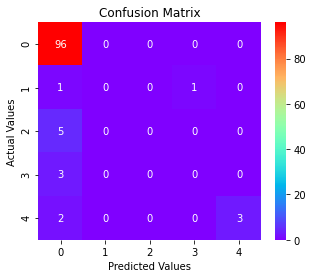

In [180]:
#Confusion matrix plot for test data
plt.figure(figsize=(5,4))
sns.heatmap(cmTest, annot=True,cmap = 'rainbow')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [181]:
#classification report for train
print(classification_report(y_train80, ypredTrain))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       382
           1       0.00      0.00      0.00         4
           2       1.00      0.12      0.21        17
           3       1.00      0.11      0.20        18
           4       1.00      0.62      0.76        21

    accuracy                           0.90       442
   macro avg       0.78      0.37      0.42       442
weighted avg       0.90      0.90      0.87       442



**Classification report for train data and test data consists of precision , recall, f1-score and support values for target column. It also contains accuracy, macro average and weighted average.**

In [182]:
#classification report for test
print(classification_report(y_test20, ypredTest))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        96
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       1.00      0.60      0.75         5

    accuracy                           0.89       111
   macro avg       0.38      0.32      0.34       111
weighted avg       0.82      0.89      0.85       111



In [183]:
clasDf_train.head()

Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL  CREA   GGT  PROT  \
0   39    0  46.4   59.2  14.1   18.9   4.5   7.90  4.55  61.0  14.5  77.3   
1   37    1  46.1   44.3  42.7   26.5   6.4  10.86  5.05  74.0  22.2  73.1   
2   32    1  50.9   65.5  23.2   21.2   6.9   8.69  4.10  83.0  13.7  71.3   
3   46    0  36.7   62.3  10.8   17.4   3.7   6.17  4.07  67.0  15.1  69.0   
4   56    1  23.0  105.6   5.1  123.0  43.0   1.80  2.40  62.7  35.9  62.8   

   Category  
0         0  
1         0  
2         0  
3         0  
4         4

### Multinomial Logistic Regression

In [184]:
#Here, multinomial logistic regression model is developed.
#I am considering top 4 columns with high correlation values as feature set. And target column as target.

multiX = clasDf_train[['ALB','AST','GGT','PROT']]
multiY = clasDf_train[clasDf_train.columns[-1]]


In [185]:
#we are not mentioning ratio of split here. Model by default does that in 75-25 ratio.
X_trainMulti, X_testMulti, y_trainMulti, y_testMulti = train_test_split(multiX, multiY, random_state = 0)

#scaling data before applying regression.
scaler = MinMaxScaler()
X_trainMulti = scaler.fit_transform(X_trainMulti)
X_testMulti = scaler.transform(X_testMulti)

#here, multi class indicates that we are passing multinomial features.
multilreg = LogisticRegression(multi_class="multinomial",random_state = 0)
multilreg.fit(X_trainMulti, y_trainMulti)

LogisticRegression(multi_class='multinomial', random_state=0)

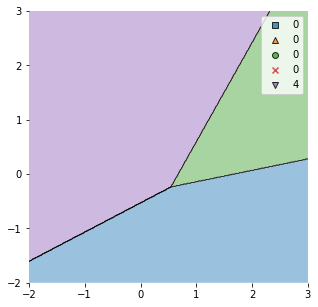

In [186]:
from mlxtend.plotting import plot_decision_regions
fig, ax = plt.subplots(figsize = (5,5))
value=1.5
width=0.75
plot_decision_regions(X_trainMulti, y_trainMulti.to_numpy(), clf = multilreg,
                      zoom_factor = 0.5, filler_feature_values={2: value, 3:value},
                  filler_feature_ranges={2: width, 3: width},legend =2, ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, multiY)

#### Multinomial logistic regression evaluation

In [187]:
#predicting Y values using test data.
multiYPred = multilreg.predict(X_testMulti)

#calculating model accuracy score using y prediction and test data.
print("Accuracy is : {:.3f}".format(accuracy_score(y_testMulti, multiYPred)))

#we have got model accuracy as 85%, which can be considered as so far better model for our dataset.

#building confusion matrix for getting true and false positive and negative values.
#which is used to calculate precision, recall and f1 score.
print("Confusion matrix:\n{}".format(confusion_matrix(y_testMulti, multiYPred)))

Accuracy is : 0.856
Confusion matrix:
[[118   0   0   0   0]
 [  1   0   0   0   1]
 [  5   0   0   0   1]
 [  6   0   0   0   1]
 [  5   0   0   0   1]]


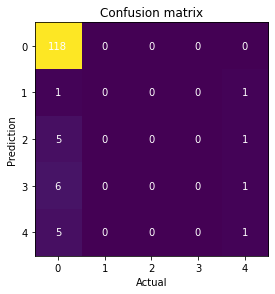

In [188]:
%matplotlib inline
confusion = confusion_matrix(y_testMulti, multiYPred)

fig, ax = plt.subplots()
plt.imshow(confusion)
plt.title("Confusion matrix")

ax.set_xticks(np.arange(len(confusion)))
ax.set_yticks(np.arange(len(confusion[0])))

# Loop over data dimensions and create text annotations.
for i in range(len(confusion)):
    for j in range(len(confusion[0])):
        text = ax.text(j, i, confusion[i, j],
                       ha="center", va="center", color="w")
fig.tight_layout()
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [189]:
#to evaluate system performances using data, we calculate macro and micro precision, recall and f1 score
print('Macro precision: ', precision_score(y_testMulti, multiYPred, average= 'macro'))
print('Micro precision: ', precision_score(y_testMulti, multiYPred, average= 'micro'))
print('Macro recall: ', recall_score(y_testMulti, multiYPred, average= 'macro'))
print('Micro recall: ', precision_score(y_testMulti, multiYPred, average= 'micro'))
print('Macro f1-score: ', f1_score(y_testMulti, multiYPred, average= 'macro'))
print('Micro f1-score: ', f1_score(y_testMulti, multiYPred, average= 'micro'))

Macro precision:  0.22481481481481486
Micro precision:  0.8561151079136691
Macro recall:  0.23333333333333334
Micro recall:  0.8561151079136691
Macro f1-score:  0.22656126482213437
Micro f1-score:  0.8561151079136691


### Decision Trees

    Decision Trees are supervised machine learning algorithms that can be used for both classification and regression.
    Here, I am using decision tree classifier for classification. Tree is build by using nodes and leaves.

In [190]:
#feature and training set
dx =clasDf_train[clasDf_train.columns[:-1]] #taking all the columns except target
dy = clasDf_train[clasDf_train.columns[-1]]

In [191]:
#we are not mentioning ratio of split here. Model by default does that in 75-25 ratio.
X_trainD, X_testD, y_trainD, y_testD = train_test_split(dx, dy, random_state = 0)

In [192]:
#scaling the data using standard scaler for developing model.
scaler = StandardScaler()
scaler.fit(X_trainD)
X_trainD = scaler.transform(X_trainD)
X_testD = scaler.transform(X_testD)

In [193]:
# instantiating and training the model
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_trainD, y_trainD)

DecisionTreeClassifier(random_state=0)

In [194]:
#deriving acuracy of the model using train data and test data seperately

print("Accuracy on training set: {:.3f}".format(dt.score(X_trainD, y_trainD)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_testD, y_testD)))



#To be surprised, our model is giving 100% accuracy with trained data and 90% with test data.

Accuracy on training set: 1.000
Accuracy on test set: 0.906


#### Plotting Decision Tree

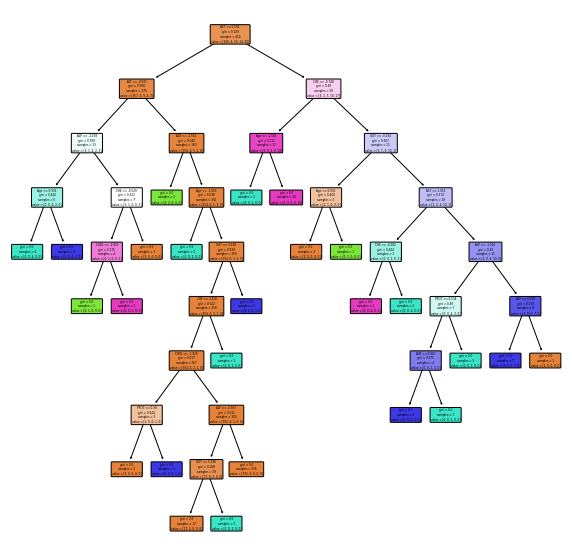

In [195]:
from sklearn import tree 

plt.subplots(figsize = (10,10))
tree.plot_tree(dt, 
               feature_names=dx.columns,  
               filled=True,
               rounded = True)
plt.show()

#### Plotting Decision Boundary

<AxesSubplot:>

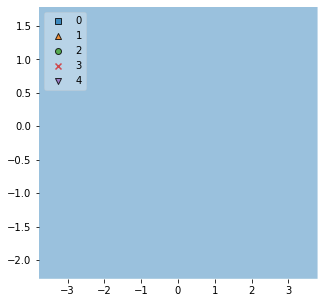

In [196]:
from mlxtend.plotting import plot_decision_regions
value=1.5
width=0.75
plt.subplots(figsize = (5,5))
plot_decision_regions(X = X_trainD,
                      y = y_trainD.values, 
                      clf = dt,
                      filler_feature_values={2: value, 3:value, 4:value, 5:value, 6:value, 
                                                      7:value, 8:value, 9:value, 10:value,11:value},
                  filler_feature_ranges={2: width, 3: width,4: width,5: width,6: width,7: width,8: width,
                                        9: width,10: width,11: width},legend =2)

#### Early Stopping: ``max_depth``
    Max_depth = 3
    Max_depth = 2

**max_depth = 3**

In [197]:
dt = DecisionTreeClassifier(random_state = 0, max_depth = 3)
dt.fit(X_trainD, y_trainD)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [198]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_trainD, y_trainD)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_testD, y_testD)))

Accuracy on training set: 0.947
Accuracy on test set: 0.899


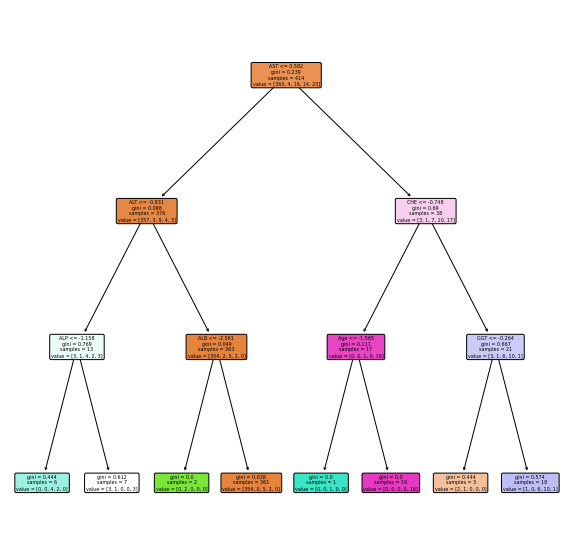

In [199]:
plt.subplots(figsize = (10,10))
tree.plot_tree(dt, 
               feature_names=dx.columns,  
               filled=True,
               rounded = True)
plt.show()

**max_depth = 2**

In [200]:
dt = DecisionTreeClassifier(random_state = 0, max_depth = 2)
dt.fit(X_trainD, y_trainD)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [201]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_trainD, y_trainD)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_testD, y_testD)))

Accuracy on training set: 0.928
Accuracy on test set: 0.871


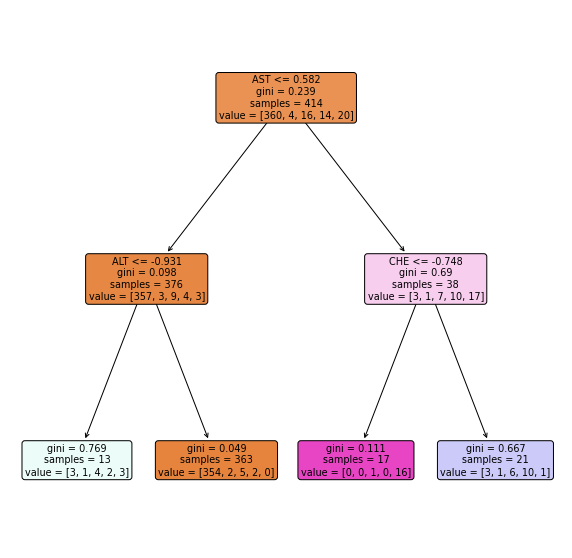

In [202]:
plt.subplots(figsize = (10,10))
tree.plot_tree(dt, 
               feature_names=dx.columns,  
               filled=True,
               rounded = True)
plt.show()

**By comparing both the models with max depth as 2 and 3, we got more accuracy for maxdepth 3 with 94% on training data and 89.9% on test data**

**Without implementing the concept of maxdepth, we are getting more accuracy for decision tree classifier.**

**By this, we can say that early stopping with max depth constraint may decrease the accuracy of the model.**

#### Early Stopping: ``min_samples_split``

In [203]:
#Implementing decision tree classifier model with min samples split concept.
#here we considered the samples values as 28

#This means, here 28 samples are needed for splitting the internal node.

dt = DecisionTreeClassifier(random_state = 0, min_samples_split= 28)
dt.fit(X_trainD, y_trainD)

DecisionTreeClassifier(min_samples_split=28, random_state=0)

In [204]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_trainD, y_trainD)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_testD, y_testD)))

Accuracy on training set: 0.942
Accuracy on test set: 0.885


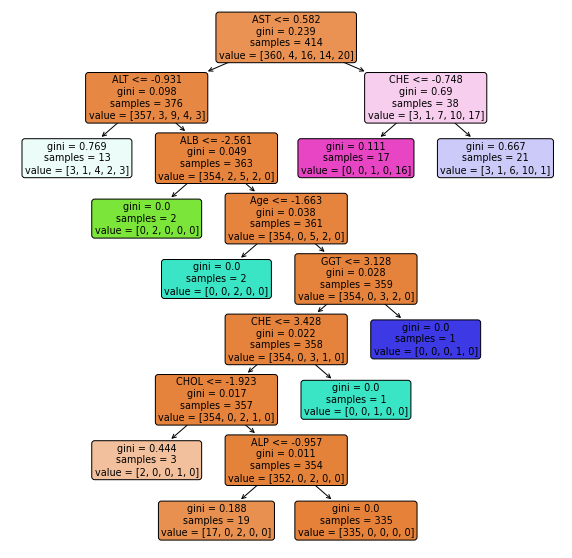

In [205]:
plt.subplots(figsize = (10,10))
tree.plot_tree(dt, 
               feature_names=dx.columns,  
               filled=True,
               rounded = True)
plt.show()

#### Early Stopping: ``min_impurity_decrease``

In [206]:
dt = DecisionTreeClassifier(random_state = 0, min_impurity_decrease= 0.01)
dt.fit(X_trainD, y_trainD)

DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=0)

In [207]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_trainD, y_trainD)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_testD, y_testD)))

Accuracy on training set: 0.928
Accuracy on test set: 0.871


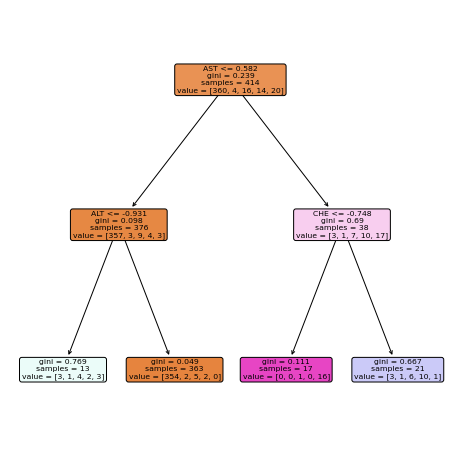

In [208]:
plt.subplots(figsize = (8,8))
tree.plot_tree(dt, 
               feature_names=dx.columns,  
               filled=True,
               rounded = True)
plt.show()

### Analyzing best model

**The accuracy of the logistic regression model is 'train score: 0.9027149321266968
test score: 0.8918918918918919'**

**The accuracy of the decision tree model is 'Accuracy on training set: 1.000
Accuracy on test set: 0.906'**

**Based on accuracy of the model, we are considering decision model as the best model and proceeding with this for test data prediction.**

## Classification Prediction

In [209]:
#predicting target values using decision tree model for test classification dataset
dt.predict(clasDfTest_mmScal)

array([0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0])